In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torchvision
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from torchvision.models import ResNet50_Weights
from sklearn.neighbors import NearestNeighbors
import torch.nn.functional as F
from torchvision.transforms.functional import resize, to_pil_image
from typing import Tuple
import matplotlib.pyplot as plt

In [ ]:
# import torchvision
# import torch.nn as nn
# import torchvision.models as models
# import torchvision.transforms as transforms
# from PIL import Image
# import os
# import numpy as np
# from google.colab import drive
# msra_masks_folder='/content/drive/MyDrive/MASK'
# # Define paths to datasets
# msra_folder = '/content/drive/MyDrive/IMAGE'
# # ecssd_image_path = '/content/drive/MyDrive/ecssd_img/0004.jpg'

# # Check if GPU is available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Define the feature extractor network
# class FeatureExtractor(nn.Module):
#     def __init__(self):
#         super(FeatureExtractor, self).__init__()
#         resnet = models.resnet50(weights=torchvision.models.resnet.ResNet50_Weights.DEFAULT)
#         modules = list(resnet.children())[:-1]  # Remove the classification layer
#         self.feature_extractor = nn.Sequential(*modules)

#     def forward(self, x):
#         return self.feature_extractor(x)

# # Load the pre-trained feature extractor
# feature_extractor = FeatureExtractor().to(device)
# feature_extractor.eval()

# # # Function to extract target embeddings for a batch of images
# # def extract_embeddings(image_folder):
# #     embeddings = []
# #     for filename in os.listdir(image_folder):
# #         if filename.endswith(('.jpg', '.jpeg', '.png')):
# #             image_path = os.path.join(image_folder, filename)
# #             img = Image.open(image_path).convert('RGB')
# #             img = transforms.Compose([
# #                 transforms.Resize(256),
# #                 transforms.CenterCrop(224),
# #                 transforms.ToTensor(),
# #                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# #             ])(img).unsqueeze(0).to(device)
# #             with torch.no_grad():
# #                 features = feature_extractor(img)
# #             embeddings.append(features.squeeze().cpu().numpy())
# #     return np.array(embeddings)

# # Function to calculate cosine similarity
# # def cosine_similarity(a, b):
# #     return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# # # Function to find k similar images in MSRA dataset for a single image in ECSSD dataset
# # def find_similar_images(ecssd_embedding, msra_embeddings, k):
# #     similarities = [cosine_similarity(ecssd_embedding, emb) for emb in msra_embeddings]
# #     similar_indices = np.argsort(similarities)[-k:]
# #     return similar_indices

# # Extract embeddings for MSRA dataset
# # print("Extracting embeddings for MSRA dataset...")
# # msra_embeddings = extract_embeddings(msra_folder)
# # print("Embeddings extracted for MSRA dataset.")

# # # Extract embedding for the single image from ECSSD dataset
# # print("Extracting embedding for the single image from ECSSD dataset...")
# # ecssd_img = Image.open(ecssd_image_path).convert('RGB')
# # ecssd_img = transforms.Compose([
# #     transforms.Resize(256),
# #     transforms.CenterCrop(224),
# #     transforms.ToTensor(),
# #     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# # ])(ecssd_img).unsqueeze(0).to(device)
# # with torch.no_grad():
# #     ecssd_image_embedding = feature_extractor(ecssd_img).squeeze().cpu().numpy()
# # print("Embedding extracted for the single image from ECSSD dataset.")

# # # Find k similar images in MSRA dataset for the single image from ECSSD dataset
# # k = 2  # Number of similar images to find
# # similar_indices = find_similar_images(ecssd_image_embedding, msra_embeddings, k)

# # # Print the indices of similar images in MSRA dataset
# # print("Indices of similar images in MSRA dataset:", similar_indices)



FeatureExtractor(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

In [ ]:
# def cosine_similarity(a, b):
#     return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# # Function to find k similar images in MSRA dataset for a single image in ECSSD dataset
# def find_similar_images(ecssd_embedding, msra_embeddings, k):
#     similarities = [cosine_similarity(ecssd_embedding, emb) for emb in msra_embeddings]
#     similar_indices = np.argsort(similarities)[-k:]
#     return similar_indices

In [ ]:
msra_dir='/content/drive/MyDrive/IMAGE'
msra_embeddings_file = "msra_embeddings1.npy"

# Create a DataLoader for MSRA dataset
msra_dataset = FolderDataset(msra_dir, transform1)
msra_loader = DataLoader(msra_dataset, batch_size=32, shuffle=False, num_workers=2)

# Generate and save embeddings
def generate_embeddings(loader, model, device):
    embeddings = []
    filenames = []
    with torch.no_grad():
        for images, fnames in loader:
            images = images.to(device)
            outputs = model(images)
            embeddings.append(outputs.cpu().numpy())
            filenames.extend(fnames)
    embeddings = np.vstack(embeddings)
    return embeddings, filenames

# Generate embeddings for MSRA dataset
msra_embeddings, msra_filenames = generate_embeddings(msra_loader, encoder, device)
np.save(msra_embeddings_file, msra_embeddings)
np.save("msra_filenames1.npy", msra_filenames)


NameError: name 'FolderDataset' is not defined

In [ ]:
# msra_masks_folder='/content/drive/MyDrive/MASK'
# # Define paths to datasets
# msra_folder = '/content/drive/MyDrive/IMAGE'

In [ ]:
# ecssd_image_path = '/content/drive/MyDrive/ecssd_img/0929.jpg'

In [ ]:
# from PIL import Image
# #Extract embedding for the single image from ECSSD dataset
# print("Extracting embedding for the single image from ECSSD dataset...")
# ecssd_img = Image.open(ecssd_image_path).convert('RGB')
# ecssd_img = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])(ecssd_img).unsqueeze(0).to(device)
# with torch.no_grad():
#     ecssd_image_embedding = feature_extractor(ecssd_img).squeeze().cpu().numpy()
# print("Embedding extracted for the single image from ECSSD dataset.")

# # Find k similar images in MSRA dataset for the single image from ECSSD dataset
# k = 2  # Number of similar images to find
# similar_indices = find_similar_images(ecssd_image_embedding, msra_embeddings, k)

# # Print the indices of similar images in MSRA dataset
# print("Indices of similar images in MSRA dataset:", similar_indices)



Extracting embedding for the single image from ECSSD dataset...
Embedding extracted for the single image from ECSSD dataset.
Indices of similar images in MSRA dataset: [  27 2714]


In [ ]:
# import pickle
# msra_embeddings_path = '/content/drive/MyDrive/msra_embeddings.pkl'
# with open(msra_embeddings_path, 'wb') as f:
#     pickle.dump(msra_embeddings, f)

In [ ]:
# def get_file_paths(folder, indices):
#     all_files = sorted([os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(('.jpg', '.jpeg', '.png'))])
#     file_paths = [all_files[idx] for idx in indices[0]]  # indices[0] since indices is a 2D array
#     return file_paths
# indices=similar_indices
# # Get the paths of the similar images
# similar_image_paths = get_file_paths(msra_folder, indices)

# # Print the paths of similar images
# print("Paths of similar images from MSRA dataset:")
# for path in similar_image_paths:
#     print(path)

# # Display the similar images
# import matplotlib.pyplot as plt

# print("Displaying similar images from MSRA dataset:")
# fig, axes = plt.subplots(1, k, figsize=(15, 5))
# for i, path in enumerate(similar_image_paths):
#     img = Image.open(path)
#     axes[i].imshow(img)
#     axes[i].axis('off')
# plt.show()

TypeError: 'numpy.int64' object is not iterable

In [ ]:

# Define a Dataset class for loading images from a folder
class FolderDataset(Dataset):
    def __init__(self, main_dir, transform=None):
        self.main_dir = main_dir
        self.transform = transform
        self.all_imgs = os.listdir(main_dir)

    def __len__(self):
        return len(self.all_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.all_imgs[idx])
        image = Image.open(img_loc).convert("RGB")
        if self.transform is not None:
            image = self.transform(image)
        return image, self.all_imgs[idx]

# Load the pre-trained ResNet model and modify it to output embeddings
class ResNetEncoder(nn.Module):
    def __init__(self):
        super(ResNetEncoder, self).__init__()
        resnet = models.resnet50(weights=ResNet50_Weights.DEFAULT)
        self.features = nn.Sequential(*list(resnet.children())[:-1])  # Remove the last classification layer

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        return x

# Initialize the model
encoder = ResNetEncoder()
encoder.eval()  # Set to evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 103MB/s]


ResNetEncoder(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv

In [ ]:
import pickle
msra_embeddings_path = '/content/drive/MyDrive/untitled'
with open(msra_embeddings_path, 'wb') as f:
    pickle.dump(msra_embeddings, f)


In [ ]:
msra_file_path = '/content/drive/MyDrive/untitled'
with open(msra_file_path, 'wb') as f:
    pickle.dump(msra_filenames, f)

In [ ]:
ecssd_image_path = '/content/drive/MyDrive/ecssd_img/0047.jpg'
msra_dir = '/content/drive/MyDrive/IMAGE'
mask_dir='/content/drive/MyDrive/MASK'

In [ ]:
msra_embeddings = np.load('/content/drive/MyDrive/msra_embeddings1.npy',allow_pickle=True)
msra_filenames = np.load('/content/drive/MyDrive/msra_filenames1.npy',allow_pickle=True)

In [ ]:

transform1 = T.Compose([
    T.Resize((224, 224)),  # ResNet input size
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
def compute_and_sort_distance_matrix(ecssd_dir, msra_embeddings, msra_filenames, encoder):
    ecssd_files = [os.path.join(ecssd_dir, fname) for fname in os.listdir(ecssd_dir) if fname.endswith('.jpg') or fname.endswith('.png')]
    ecssd_file_names = [os.path.basename(fname) for fname in ecssd_files]
    num_ecssd = len(ecssd_files)
    num_msra = msra_embeddings.shape[0]

    distance_matrix = np.zeros((num_ecssd, num_msra))
    sorted_indices_matrix = np.zeros((num_ecssd, num_msra), dtype=int)

    knn = NearestNeighbors(n_neighbors=num_msra, metric="cosine")  # All MSRA embeddings
    knn.fit(msra_embeddings)

    for i, ecssd_path in enumerate(ecssd_files):
        # Load and preprocess the ECSSD image
        image = Image.open(ecssd_path).convert("RGB")
        image_tensor = transform1(image).unsqueeze(0).to(device)

        with torch.no_grad():
            ecssd_embedding = encoder(image_tensor).cpu().numpy().reshape(1, -1)

        # Compute cosine distances
        distances, indices = knn.kneighbors(ecssd_embedding)

        # Sort distances and keep track of original indices
        sorted_indices = np.argsort(distances[0])
        sorted_distances = distances[0][sorted_indices]

        distance_matrix[i, :] = sorted_distances
        sorted_indices_matrix[i, :] = indices[0][sorted_indices]



    return distance_matrix, sorted_indices_matrix, ecssd_file_names


# Directory paths
ecssd_dir = '/content/drive/MyDrive/ecssd_img'


In [ ]:
distance_matrix, sorted_indices_matrix, ecssd_file_names = compute_and_sort_distance_matrix(ecssd_dir, msra_embeddings, msra_filenames, encoder)

# Save the distance matrix and related data
np.save('/content/drive/MyDrive/distance_matrix1.npy', distance_matrix)
np.save('/content/drive/MyDrive/sorted_indices_matrix1.npy', sorted_indices_matrix)
np.save('/content/drive/MyDrive/ecssd_file_names1.npy', ecssd_file_names)
np.save('/content/drive/MyDrive/msra_Filenames1.npy', msra_filenames)



In [ ]:
def get_top_k_similar_images_by_name(ecssd_image_name, k=5):
    ecssd_file_names = np.load('/content/drive/MyDrive/ecssd_file_names1.npy', allow_pickle=True)
    msra_filenames = np.load('/content/drive/MyDrive/msra_Filenames1.npy', allow_pickle=True)
    sorted_indices_matrix = np.load('/content/drive/MyDrive/sorted_indices_matrix1.npy')

    # Find the index of the ECSSD image by its name
    ecssd_index = np.where(ecssd_file_names == ecssd_image_name)[0][0]

    # Get the top-k indices for the specified ECSSD image
    top_k_indices = sorted_indices_matrix[ecssd_index, :k]
    top_k_filenames = [msra_filenames[idx] for idx in top_k_indices]

    return  top_k_filenames

# # Example usage
# ecssd_image_name = '0047.jpg'  # Name of the ECSSD image you want to find similar images for
# k = 5  # Number of top similar images you want
# top_k_filenames = get_top_k_similar_images_by_name(ecssd_image_name, k)


# print("Top K Similar MSRA Images:")
# for i in range(k):
#     print(f"{i+1}. {top_k_filenames[i]}")


In [ ]:
transform1 = T.Compose([
    T.Resize((224, 224)),  # ResNet input size
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
def find_similar_images(single_image_path, k=1):
    # Load the precomputed embeddings and filenames
    msra_embeddings = np.load('/content/drive/MyDrive/msra_embeddings.npy',allow_pickle=True)
    msra_filenames = np.load('/content/drive/MyDrive/msra_filenames.npy',allow_pickle=True)

    # Load and preprocess the single image
    image = Image.open(ecssd_image_path).convert("RGB")
    image_tensor = transform1(image).unsqueeze(0).to(device)

    # Initialize Nearest Neighbors model
    knn = NearestNeighbors(n_neighbors=k + 1, metric="cosine")  # Adding one to filter out the query image itself
    knn.fit(msra_embeddings)

    # Find similar images
    similar_images = []
    with torch.no_grad():
        embedding = encoder(image_tensor).cpu().numpy().reshape(1, -1)

        _, indices = knn.kneighbors(embedding)
        similar_filenames = [msra_filenames[i] for i in indices[0] if msra_filenames[i] != os.path.basename(single_image_path)]
        similar_images.extend(similar_filenames[:k])

    # with torch.no_grad():
    #     embedding = encoder(image_tensor).cpu().numpy().reshape(1, -1)
    #     _, indices = knn.kneighbors(embedding)
    #     similar_filenames = [msra_filenames[i] for i in indices[0] if msra_filenames[i] != os.path.basename(ecssd_image_path)]
    #     similar_images.extend(similar_filenames[:k])
    #    #similar_images[ecssd_image_path] = similar_filenames[:k]  # Ensure only k similar images are returned
    return similar_images
    # Print the results
#     print(f"Query Image: {ecssd_image_path}")
#     for i, img in enumerate(similar_images):
#         print(f"  Similar Image {i + 1}: {img}")

#     # Display the query image and similar images
#     plt.figure(figsize=(15, 5))
#     plt.subplot(1, k + 1, 1)
#     plt.imshow(image)
#     plt.title("Query Image")
#     plt.axis('off')

#     for i, img in enumerate(similar_images):
#         similar_image = Image.open(os.path.join(msra_dir, img)).convert("RGB")
#         plt.subplot(1, k + 1, i + 2)
#         plt.imshow(similar_image)
#         plt.title(f"Similar Image {i + 1}")
#         plt.axis('off')

#     plt.show()

# find_similar_images(ecssd_image_path, k=10)



In [ ]:
ecssd_image_path='/content/drive/MyDrive/ecssd_img/0859.jpg'


In [ ]:
s=find_similar_images(ecssd_image_path,10)

  Similar Image 1: 5_156_156392.jpg
  Similar Image 2: 0_8_8860.jpg
  Similar Image 3: 6_171_171506.jpg
  Similar Image 4: 10_268015474_2bd515353c.jpg
  Similar Image 5: 6_177_177229.jpg
  Similar Image 6: 1_31_31720.jpg
  Similar Image 7: 2_75_75723.jpg
  Similar Image 8: 7_205_205157.jpg
  Similar Image 9: 2_90_90135.jpg
  Similar Image 10: 2_76_76326.jpg


NameError: name 'image' is not defined

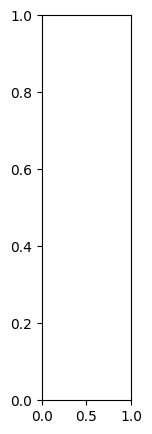

In [ ]:
k=10
for i, img in enumerate(s):
 print(f"  Similar Image {i + 1}: {img}")

plt.figure(figsize=(15, 5))
plt.subplot(1, k + 1, 1)
plt.imshow(image)
plt.title("Query Image")
plt.axis('off')

for i, img in enumerate(s):
        similar_image = Image.open(os.path.join(msra_dir, img)).convert("RGB")
        plt.subplot(1, k + 1, i + 2)
        plt.imshow(similar_image)
        plt.title(f"Similar Image {i + 1}")
        plt.axis('off')

plt.show()

In [ ]:
from transformers import AutoProcessor, SamModel
# from transformers import PerSamModel

processor = AutoProcessor.from_pretrained("facebook/sam-vit-huge")
# model = PerSamModel.from_pretrained("facebook/sam-vit-huge")
model = SamModel.from_pretrained("facebook/sam-vit-huge")
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)


In [ ]:
import cv2

In [ ]:
from torchvision.transforms.functional import resize, to_pil_image
import torch.nn.functional as F
from torchvision import transforms as T
from sklearn.neighbors import NearestNeighbors

In [ ]:
from typing import Tuple
# # Define transformations
# transform = T.Compose([
#     T.Resize((1024, 1024)),  # Ensure input size matches the model requirements
#     T.ToTensor(),
#     T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])
def get_preprocess_shape(oldh: int, oldw: int, long_side_length: int) -> Tuple[int, int]:
    """
    Compute the output size given input size and target long side length.
    """
    scale = long_side_length * 1.0 / max(oldh, oldw)
    newh, neww = oldh * scale, oldw * scale
    neww = int(neww + 0.5)
    newh = int(newh + 0.5)
    return (newh, neww)

def preprocess(x: torch.Tensor, pixel_mean=[123.675, 116.28, 103.53], pixel_std=[58.395, 57.12, 57.375], img_size=1024) -> torch.Tensor:
    """Normalize pixel values and pad to a square input."""

    pixel_mean = torch.Tensor(pixel_mean).view(-1, 1, 1)
    pixel_std = torch.Tensor(pixel_std).view(-1, 1, 1)

    # Normalize colors
    x = (x - pixel_mean) / pixel_std

    # Pad
    h, w = x.shape[-2:]
    padh = img_size - h
    padw = img_size - w
    x = F.pad(x, (0, padw, 0, padh))
    return x

def prepare_mask(image, target_length=1024):
  target_size = get_preprocess_shape(image.shape[0], image.shape[1], target_length)
  mask = np.array(resize(to_pil_image(image), target_size))

  input_mask = torch.as_tensor(mask)/255.0
  # input_mask = input_mask.permute(2, 0, 1).contiguous()[None, :, :, :]
  input_mask = input_mask.unsqueeze(0).unsqueeze(0)
  input_mask = preprocess(input_mask)

  return input_mask
# # Helper functions
# def preprocess(image, img_size=1024):
#     pixel_mean = torch.Tensor([123.675, 116.28, 103.53]).view(-1, 1, 1)
#     pixel_std = torch.Tensor([58.395, 57.12, 57.375]).view(-1, 1, 1)
#     image = (image - pixel_mean) / pixel_std
#     h, w = image.shape[-2:]
#     padh = img_size - h
#     padw = img_size - w
#     image = F.pad(image, (0, padw, 0, padh))
#     return image

# def prepare_mask(image, target_length=1024):
#     target_size = get_preprocess_shape(image.shape[0], image.shape[1], target_length)
#     mask = np.array(resize(to_pil_image(image), target_size))
#     input_mask = torch.as_tensor(mask)
#     input_mask = input_mask.permute(2, 0, 1).contiguous()[None, :, :, :]
#     input_mask = preprocess(input_mask)
#     return input_mask

# def get_preprocess_shape(oldh: int, oldw: int, long_side_length: int):
#     scale = long_side_length * 1.0 / max(oldh, oldw)
#     newh, neww = oldh * scale, oldw * scale
#     neww = int(neww + 0.5)
#     newh = int(newh + 0.5)
#     return (newh, neww)

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([255, 0, 0, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def process_ecssd_image(ecssd_image_path, k=5):
    similar_images = find_similar_images(ecssd_image_path, k)
    target_image = Image.open(ecssd_image_path).convert("RGB")

    # Generate and average masks
    aggregated_mask = np.zeros((1024,1024), dtype=np.float32)
    for similar_image_name in similar_images:
        similar_image_path = os.path.join(msra_dir, similar_image_name)
        similar_mask_path = os.path.join(mask_dir, similar_image_name.replace('.jpg', '.png'))

        # Load the similar image and its mask
        similar_image = Image.open(similar_image_path).convert("RGB")
        # similar_mask = cv2.imread(similar_mask_path)
        # similar_mask = cv2.cvtColor(similar_mask, cv2.COLOR_BGR2RGB)
        similar_mask = cv2.imread(similar_mask_path, cv2.IMREAD_GRAYSCALE)
        # Compute the reference features
        pixel_values = processor(images=similar_image, return_tensors="pt").pixel_values
        with torch.no_grad():
            ref_feat = model.get_image_embeddings(pixel_values.to(device))
            ref_feat = ref_feat.squeeze().permute(1, 2, 0)

        # Prepare the reference mask
        ref_mask = prepare_mask(similar_mask)
        ref_mask = F.interpolate(ref_mask, size=ref_feat.shape[0: 2], mode="bilinear")
        ref_mask = ref_mask.squeeze()[0]

        target_feat = ref_feat[ref_mask > 0]
        target_embedding = target_feat.mean(0).unsqueeze(0)
        target_feat = target_embedding / target_embedding.norm(dim=-1, keepdim=True)
        target_embedding = target_embedding.unsqueeze(0)

        # Prepare the target image
        inputs = processor(images=target_image, return_tensors="pt").to(device)
        pixel_values = inputs.pixel_values
        with torch.no_grad():
            test_feat = model.get_image_embeddings(pixel_values).squeeze()

        # Compute cosine similarity
        num_channels, height, width = test_feat.shape
        test_feat = test_feat / test_feat.norm(dim=0, keepdim=True)
        test_feat_reshaped = test_feat.reshape(num_channels, height * width)
        sim = target_feat @ test_feat_reshaped

        sim = sim.reshape(1, 1, height, width)
        sim = F.interpolate(sim, scale_factor=4, mode="bilinear")

        sim = processor.post_process_masks(sim.unsqueeze(1),original_sizes=[(1024, 1024)], reshaped_input_sizes=[(1024, 1024)],
                                           binarize=False)
        sim = sim[0].squeeze()

        aggregated_mask += sim.cpu().numpy()

    # Average the masks
    aggregated_mask /= k
    binary_mask = (aggregated_mask > 0.5).astype(np.uint8)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    show_mask(aggregated_mask, axes[0])

    axes[0].axis("off")

    show_mask(binary_mask, axes[1])

    axes[1].axis("off")

    plt.show()

    # # Optional: Display the mask
    # fig, axes = plt.subplots()
    # show_mask(aggregated_mask, axes)
    # show_mask(binary_mask, axes)
    # axes.axis("off")
    # plt.show()



NameError: name 'target_image_name' is not defined

/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


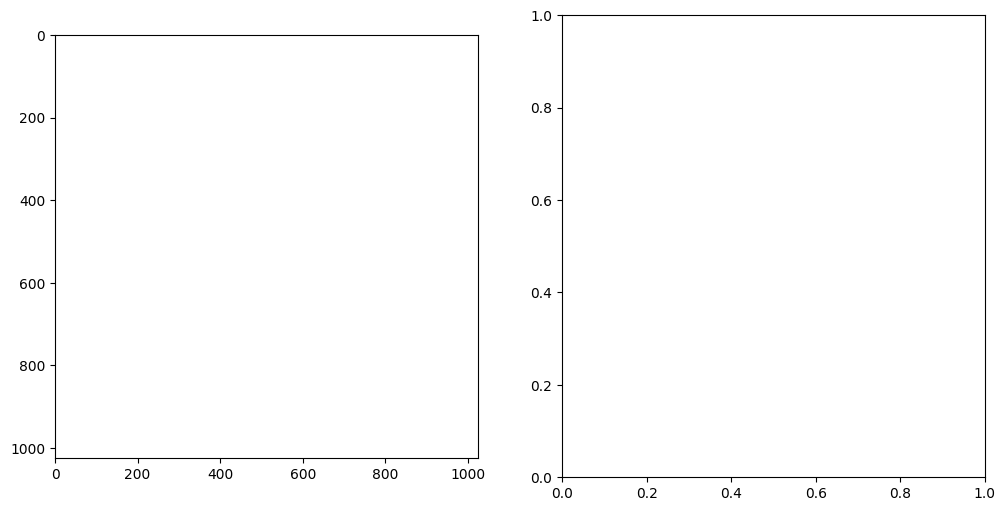

In [ ]:
process_ecssd_image(ecssd_image_path, k=10)

In [ ]:
from typing import Tuple
# # Define transformations
# transform = T.Compose([
#     T.Resize((1024, 1024)),  # Ensure input size matches the model requirements
#     T.ToTensor(),
#     T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])
def get_preprocess_shape(oldh: int, oldw: int, long_side_length: int) -> Tuple[int, int]:
    """
    Compute the output size given input size and target long side length.
    """
    scale = long_side_length * 1.0 / max(oldh, oldw)
    newh, neww = oldh * scale, oldw * scale
    neww = int(neww + 0.5)
    newh = int(newh + 0.5)
    return (newh, neww)

def preprocess(x: torch.Tensor, pixel_mean=[123.675, 116.28, 103.53], pixel_std=[58.395, 57.12, 57.375], img_size=1024) -> torch.Tensor:
    """Normalize pixel values and pad to a square input."""

    pixel_mean = torch.Tensor(pixel_mean).view(-1, 1, 1)
    pixel_std = torch.Tensor(pixel_std).view(-1, 1, 1)

    # Normalize colors
    x = (x - pixel_mean) / pixel_std

    # Pad
    h, w = x.shape[-2:]
    padh = img_size - h
    padw = img_size - w
    x = F.pad(x, (0, padw, 0, padh))
    return x

def prepare_mask(image, target_length=1024):
  target_size = get_preprocess_shape(image.shape[0], image.shape[1], target_length)
  mask = np.array(resize(to_pil_image(image), target_size))

  input_mask = torch.as_tensor(mask)/255.0
  # input_mask = input_mask.permute(2, 0, 1).contiguous()[None, :, :, :]
  input_mask = input_mask.unsqueeze(0).unsqueeze(0)
  input_mask = preprocess(input_mask)

  return input_mask

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([255, 0, 0, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def process_ecssd_image(ecssd_image_path, k=5):
    similar_images = find_similar_images(ecssd_image_path, k)
    target_image = Image.open(ecssd_image_path).convert("RGB")

    # Generate and average masks
    aggregated_mask = np.zeros((1024,1024), dtype=np.float32)
    for similar_image_name in similar_images:
        similar_image_path = os.path.join(msra_dir, similar_image_name)
        similar_mask_path = os.path.join(mask_dir, similar_image_name.replace('.jpg', '.png'))

        # Load the similar image and its mask
        similar_image = Image.open(similar_image_path).convert("RGB")
        similar_mask = cv2.imread(similar_mask_path)
        similar_mask = cv2.cvtColor(similar_mask, cv2.COLOR_BGR2RGB)

        # Compute the reference features
        pixel_values = processor(images=similar_image, return_tensors="pt").pixel_values
        with torch.no_grad():
            ref_feat = model.get_image_embeddings(pixel_values.to(device))
            ref_feat = ref_feat.squeeze().permute(1, 2, 0)

        # Prepare the reference mask
        ref_mask = prepare_mask(similar_mask)
        ref_mask = F.interpolate(ref_mask, size=ref_feat.shape[0: 2], mode="bilinear")
        ref_mask = ref_mask.squeeze()[0]

        target_feat = ref_feat[ref_mask > 0]
        target_embedding = target_feat.mean(0).unsqueeze(0)
        target_feat = target_embedding / target_embedding.norm(dim=-1, keepdim=True)
        target_embedding = target_embedding.unsqueeze(0)

        # Prepare the target image
        inputs = processor(images=target_image, return_tensors="pt").to(device)
        pixel_values = inputs.pixel_values
        with torch.no_grad():
            test_feat = model.get_image_embeddings(pixel_values).squeeze()

        # Compute cosine similarity
        num_channels, height, width = test_feat.shape
        test_feat = test_feat / test_feat.norm(dim=0, keepdim=True)
        test_feat_reshaped = test_feat.reshape(num_channels, height * width)
        sim = target_feat @ test_feat_reshaped

        sim = sim.reshape(1, 1, height, width)
        sim = F.interpolate(sim, scale_factor=4, mode="bilinear")

        sim = processor.post_process_masks(sim.unsqueeze(1),original_sizes=[(1024, 1024)], reshaped_input_sizes=[(1024, 1024)],
                                           binarize=False)
        sim = sim[0].squeeze()

        aggregated_mask += sim.cpu().numpy()

    # Average the masks
    aggregated_mask /= k
    binary_mask = (aggregated_mask > 0.5).astype(np.uint8)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    show_mask(aggregated_mask, axes[0])

    axes[0].axis("off")

    show_mask(binary_mask, axes[1])

    axes[1].axis("off")

    plt.show()

    # # Optional: Display the mask
    # fig, axes = plt.subplots()
    # show_mask(aggregated_mask, axes)
    # show_mask(binary_mask, axes)
    # axes.axis("off")
    # plt.show()



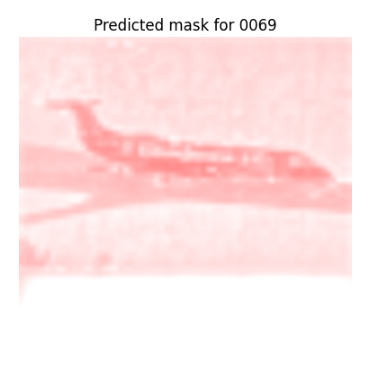

In [ ]:
aggregated_mask=Image.open('/content/download (1).png')
aggregated_mask_array = np.array(aggregated_mask)

# Convert the data type of the array to uint8
visual_mask = aggregated_mask_array.astype(np.uint8)

# Create a new PIL Image from the NumPy array
visual_mask_image = Image.fromarray(visual_mask)

# Display or use the new image as needed
visual_mask_image.show()


In [ ]:
ref_mask=Image.open('/content/drive/MyDrive/MASK/2_86_86300.png').convert("RGB")

In [ ]:
sam_model = SamModel.from_pretrained("facebook/sam-vit-huge")
sam_processor = SamProcessor.from_pretrained("facebook/sam-vit-huge")
device = "cuda" if torch.cuda.is_available() else "cpu"
sam_model.to(device)

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-31): 32 x SamVisionLayer(
        (layer_norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (layer_norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNor

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from transformers import SamModel, SamProcessor
model = SamModel.from_pretrained("facebook/sam-vit-huge")
processor = SamProcessor.from_pretrained("facebook/sam-vit-huge")


config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.56G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [ ]:
pixel_values = processor(images=ref_image, return_tensors="pt").pixel_values
# ref_image_tensor = transform(ref_image).unsqueeze(0).to(device)
# pixel_values = ref_image_tensor

NameError: name 'processor' is not defined

In [ ]:
# import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# # Step 1: Image features encoding
# with torch.no_grad():
#   ref_feat = model.get_image_embeddings(pixel_values.to(device))
#   ref_feat = ref_feat.squeeze().permute(1, 2, 0)

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-31): 32 x SamVisionLayer(
        (layer_norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (layer_norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNor

In [ ]:
ecssd_image_path = '/content/drive/MyDrive/ecssd_img/0045.jpg'

In [ ]:
test_image = Image.open(ecssd_image_path).convert("RGB")
ref_image= Image.open('/content/drive/MyDrive/IMAGE/5_156_156402.jpg').convert("RGB")
ref_mask_path = '/content/drive/MyDrive/MASK/5_156_156402.png'
# ref_mask=Image.open(ref_mask_path).convert("RGB")
ref_mask = cv2.imread(ref_mask_path)
ref_mask = cv2.cvtColor(ref_mask, cv2.COLOR_BGR2RGB)


In [ ]:
import numpy as np
import torch.nn.functional as F
from torchvision.transforms.functional import resize, to_pil_image
import torch
from typing import Tuple
from typing import Tuple
# Define transformations
# transform = T.Compose([
#     T.Resize((1024, 1024)),  # Ensure input size matches the model requirements
#     T.ToTensor(),
#     T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])
def get_preprocess_shape(oldh: int, oldw: int, long_side_length: int) -> Tuple[int, int]:
    """
    Compute the output size given input size and target long side length.
    """
    scale = long_side_length * 1.0 / max(oldh, oldw)
    newh, neww = oldh * scale, oldw * scale
    neww = int(neww + 0.5)
    newh = int(newh + 0.5)
    return (newh, neww)

def preprocess(x: torch.Tensor, pixel_mean=[123.675, 116.28, 103.53], pixel_std=[58.395, 57.12, 57.375], img_size=1024) -> torch.Tensor:
    """Normalize pixel values and pad to a square input."""

    pixel_mean = torch.Tensor(pixel_mean).view(-1, 1, 1)
    pixel_std = torch.Tensor(pixel_std).view(-1, 1, 1)

    # Normalize colors
    x = (x - pixel_mean) / pixel_std

    # Pad
    h, w = x.shape[-2:]
    padh = img_size - h
    padw = img_size - w
    x = F.pad(x, (0, padw, 0, padh))
    return x



def prepare_mask(image, target_length=1024):
  target_size = get_preprocess_shape(image.shape[0], image.shape[1], target_length)
  mask = np.array(resize(to_pil_image(image), target_size))

  input_mask = torch.as_tensor(mask)
  input_mask = input_mask.permute(2, 0, 1).contiguous()[None, :, :, :]

  input_mask = preprocess(input_mask)

  return input_mask

# ref_image_tensor = transform(ref_image).unsqueeze(0).to(device)
# pixel_values = ref_image_tensor
# pixel_values = processor(images=ref_image, return_tensors="pt").pixel_values
# with torch.no_grad():
#  ref_feat = model.get_image_embeddings(pixel_values.to(device))
#  ref_feat = ref_feat.squeeze().permute(1, 2, 0)
# # Step 2: interpolate reference mask
# ref_mask = prepare_mask(ref_mask)
# ref_mask = F.interpolate(ref_mask, size=ref_feat.shape[0: 2], mode="bilinear")
# ref_mask = ref_mask.squeeze()[0]
# test_image_tensor = transform(test_image).unsqueeze(0).to(device)
# inputs = {"pixel_values": test_image_tensor}

# with torch.no_grad():
#   test_feat = model.get_image_embeddings(test_image_tensor).squeeze()

# Step 3: Target feature extraction
# target_feat = ref_feat[ref_mask > 0]
# target_embedding = target_feat.mean(0).unsqueeze(0)
# target_feat = target_embedding / target_embedding.norm(dim=-1, keepdim=True)
# target_embedding = target_embedding.unsqueeze(0)

# # prepare test image for the model
# inputs = processor(images=test_image, return_tensors="pt").to(device)
# pixel_values = inputs.pixel_values

# # image feature encoding
# with torch.no_grad():
#  test_feat = model.get_image_embeddings(pixel_values).squeeze()

# # Cosine similarity
# num_channels, height, width = test_feat.shape
# test_feat = test_feat / test_feat.norm(dim=0, keepdim=True)
# test_feat_reshaped = test_feat.reshape(num_channels, height * width)
# sim = target_feat @ test_feat_reshaped

# sim = sim.reshape(1, 1, height, width)
# sim = F.interpolate(sim, scale_factor=4, mode="bilinear")
# sim = processor.post_process_masks(sim.unsqueeze(1), original_sizes=inputs["original_sizes"].tolist(), reshaped_input_sizes=inputs["reshaped_input_sizes"].tolist(),
#                                    binarize=False)
# sim = sim[0].squeeze()
# def point_selection(mask_sim, topk=1):
#     # Top-1 point selection
#     w, h = mask_sim.shape
#     topk_xy = mask_sim.flatten(0).topk(topk)[1]
#     topk_x = (topk_xy // h).unsqueeze(0)
#     topk_y = (topk_xy - topk_x * h)
#     topk_xy = torch.cat((topk_y, topk_x), dim=0).permute(1, 0)
#     topk_label = np.array([1] * topk)
#     topk_xy = topk_xy.cpu().numpy()

#     # Top-last point selection
#     last_xy = mask_sim.flatten(0).topk(topk, largest=False)[1]
#     last_x = (last_xy // h).unsqueeze(0)
#     last_y = (last_xy - last_x * h)
#     last_xy = torch.cat((last_y, last_x), dim=0).permute(1, 0)
#     last_label = np.array([0] * topk)
#     last_xy = last_xy.cpu().numpy()

#     return topk_xy, topk_label, last_xy, last_label

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([255, 0, 0, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)



# Positive-negative location prior
# topk_xy_i, topk_label_i, last_xy_i, last_label_i = point_selection(sim, topk=1)
# topk_xy = np.concatenate([topk_xy_i, last_xy_i], axis=0)
# topk_label = np.concatenate([topk_label_i, last_label_i], axis=0)

# # Obtain the target guidance for cross-attention layers
# sim = (sim - sim.mean()) / torch.std(sim)
# sim = F.interpolate(sim.unsqueeze(0).unsqueeze(0), size=(64, 64), mode="bilinear")
# attention_similarity = sim.sigmoid_().unsqueeze(0).flatten(3)

# # prepare test image and prompts for the model
# inputs = processor(test_image, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], return_tensors="pt").to(device)

# # First-step prediction
# with torch.no_grad():
#   outputs = model(
#       input_points=inputs.input_points,
#       input_labels=inputs.input_labels,
#       image_embeddings=test_feat.unsqueeze(0),
#       multimask_output=False,
#       attention_similarity=attention_similarity,  # Target-guided Attention
#       target_embedding=target_embedding  # Target-semantic Prompting
#   )
#   best_idx = 0
# with torch.no_grad():
#   outputs_1 = model(
#               input_points=inputs.input_points,
#               input_labels=inputs.input_labels,
#               input_masks=outputs.pred_masks.squeeze(1)[best_idx: best_idx + 1, :, :],
#               image_embeddings=test_feat.unsqueeze(0),
#               multimask_output=True)
# # Cascaded Post-refinement-2
# masks = processor.image_processor.post_process_masks(outputs_1.pred_masks.cpu(),
#                                                      inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()

# best_idx = torch.argmax(outputs_1.iou_scores).item()
# y, x = np.nonzero(masks[best_idx])
# x_min = x.min()
# x_max = x.max()
# y_min = y.min()
# y_max = y.max()
# input_boxes = [[[x_min, y_min, x_max, y_max]]]

# inputs = processor(test_image, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], input_boxes=input_boxes,
#                    return_tensors="pt").to(device)

# final_outputs = model(
#     input_points=inputs.input_points,
#     input_labels=inputs.input_labels,
#     input_boxes=inputs.input_boxes,
#     input_masks=outputs_1.pred_masks.squeeze(1)[:,best_idx: best_idx + 1, :, :],
#     image_embeddings=test_feat.unsqueeze(0),
#     multimask_output=True)
# masks = processor.image_processor.post_process_masks(final_outputs.pred_masks.cpu(),
#                                                      inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()
# import matplotlib.pyplot as plt

# def show_mask(mask, ax, random_color=False):
#     if random_color:
#         color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
#     else:
#         color = np.array([255, 0, 0, 0.6])
#     h, w = mask.shape[-2:]
#     mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
#     ax.imshow(mask_image)


# fig, axes = plt.subplots()

# best_idx = torch.argmax(final_outputs.iou_scores).item()
# axes.imshow(np.array(test_image))
# show_mask(masks[best_idx], axes)
# binary_mask = (masks[best_idx] > 0.5).astype(np.uint8) * 255
# axes.title.set_text(f"Predicted mask")
# axes.axis("off")

In [ ]:
import numpy as np
import torch.nn.functional as F
from torchvision.transforms.functional import resize, to_pil_image
import torch
from typing import Tuple
from typing import Tuple

In [ ]:
binary_mask = (masks[best_idx] >0.5).astype(np.uint8) * 255

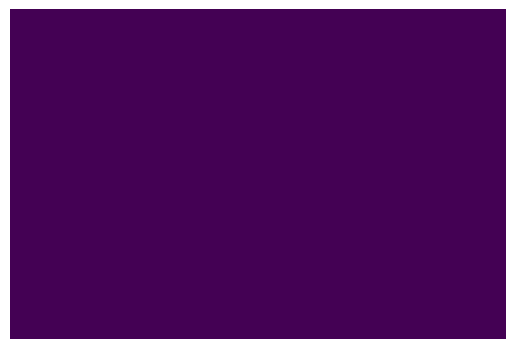

In [ ]:
    plt.figure()
    plt.imshow(binary_mask)

    plt.axis('off')
    plt.show()

In [ ]:
def perform_segmentation(ref_image, ref_mask, test_image, model, processor, device):
    # ref_image_tensor = transform(ref_image).unsqueeze(0).to(device)
    # pixel_values = ref_image_tensor
    pixel_values = processor(images=ref_image, return_tensors="pt").pixel_values
    with torch.no_grad():
        ref_feat = model.get_image_embeddings(pixel_values.to(device))
        ref_feat = ref_feat.squeeze().permute(1, 2, 0)

    ref_mask = prepare_mask(ref_mask)
    ref_mask = F.interpolate(ref_mask, size=ref_feat.shape[0:2], mode="bilinear")
    ref_mask = ref_mask.squeeze()[0]

    target_feat = ref_feat[ref_mask > 0]
    target_embedding = target_feat.mean(0).unsqueeze(0)
    target_feat = target_embedding / target_embedding.norm(dim=-1, keepdim=True)
    target_embedding = target_embedding.unsqueeze(0)

    # test_image_tensor = transform(test_image).unsqueeze(0).to(device)
    # inputs = {"pixel_values": test_image_tensor}
    inputs = processor(images=test_image, return_tensors="pt").to(device)
    pixel_values = inputs.pixel_values

    with torch.no_grad():
        test_feat = model.get_image_embeddings(pixel_values.to(device))

    num_channels, height, width = test_feat.shape
    test_feat = test_feat / test_feat.norm(dim=0, keepdim=True)
    test_feat_reshaped = test_feat.reshape(num_channels, height * width)
    sim = target_feat @ test_feat_reshaped

    sim = sim.reshape(1, 1, height, width)
    sim = F.interpolate(sim, scale_factor=4, mode="bilinear")
    sim = processor.post_process_masks(sim.unsqueeze(1), original_sizes=[(1024, 1024)], reshaped_input_sizes=[(1024, 1024)], binarize=False)
    sim = sim[0].squeeze()

    topk_xy_i, topk_label_i, last_xy_i, last_label_i = point_selection(sim, topk=1)
    topk_xy = np.concatenate([topk_xy_i, last_xy_i], axis=0)
    topk_label = np.concatenate([topk_label_i, last_label_i], axis=0)

    sim = (sim - sim.mean()) / torch.std(sim)
    sim = F.interpolate(sim.unsqueeze(0).unsqueeze(0), size=(64, 64), mode="bilinear")
    attention_similarity = sim.sigmoid_().unsqueeze(0).flatten(3)

    inputs = processor(test_image, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model(
            input_points=inputs.input_points,
            input_labels=inputs.input_labels,
            image_embeddings=test_feat.unsqueeze(0),
            multimask_output=False,
            attention_similarity=attention_similarity,
            target_embedding=target_embedding
        )
        best_idx = 0

    with torch.no_grad():
        outputs_1 = model(
            input_points=inputs.input_points,
            input_labels=inputs.input_labels,
            input_masks=outputs.pred_masks.squeeze(1)[best_idx: best_idx + 1, :, :],
            image_embeddings=test_feat.unsqueeze(0),
            multimask_output=True
        )

    masks = processor.image_processor.post_process_masks(outputs_1.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()

    best_idx = torch.argmax(outputs_1.iou_scores).item()
    y, x = np.nonzero(masks[best_idx])
    x_min = x.min()
    x_max = x.max()
    y_min = y.min()
    y_max = y.max()
    input_boxes = [[[x_min, y_min, x_max, y_max]]]

    inputs = processor(test_image, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], input_boxes=input_boxes, return_tensors="pt").to(device)

    final_outputs = model(
        input_points=inputs.input_points,
        input_labels=inputs.input_labels,
        input_boxes=inputs.input_boxes,
        input_masks=outputs_1.pred_masks.squeeze(1)[:, best_idx: best_idx + 1, :, :],
        image_embeddings=test_feat.unsqueeze(0),
        multimask_output=True
    )

    masks = processor.image_processor.post_process_masks(final_outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()

    best_idx = torch.argmax(final_outputs.iou_scores).item()
    binary_mask = (masks[best_idx] > 0.5).astype(np.uint8) * 255

    return binary_mask

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.neighbors import NearestNeighbors

# # Define the Encoder class
# class Encoder(nn.Module):
#     def __init__(self):
#         super(Encoder, self).__init__()
#         self.model = models.resnet18(pretrained=True)
#         self.model = nn.Sequential(*list(self.model.children())[:-1])  # Remove the last classification layer

#     def forward(self, x):
#         with torch.no_grad():
#             features = self.model(x)
#         return features.view(features.size(0), -1)

# # Initialize the encoder
# encoder = Encoder()
# encoder.eval()  # Set the model to evaluation mode

# # Define the transform function for preprocessing images
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Load and preprocess images for the SAM model
# def preprocess_image(image):
#     return transform(image).unsqueeze(0)

# # Find similar images using KNN
# def find_similar_images(single_image_path, k, dataset_dir):
#     image_tensor = preprocess_image(Image.open(single_image_path).convert("RGB"))
#     image_features = []
#     image_paths = []

#     for image_name in os.listdir(dataset_dir):
#         image_path = os.path.join(dataset_dir, image_name)
#         img_tensor = preprocess_image(Image.open(image_path).convert("RGB"))
#         features = encoder(img_tensor).cpu().numpy().reshape(1, -1)
#         image_features.append(features)
#         image_paths.append(image_path)

#     image_features = np.vstack(image_features)
#     knn = NearestNeighbors(n_neighbors=k, metric='cosine')
#     knn.fit(image_features)

#     query_features = encoder(image_tensor).cpu().numpy().reshape(1, -1)
#     distances, indices = knn.kneighbors(query_features)
#     similar_images = [image_paths[idx] for idx in indices[0]]
#     return similar_images

# Prepare masks for the SAM model
def prepare_mask(image, processor, target_length=1024):
    target_size = (target_length, target_length)
    mask = np.array(image.resize(target_size, Image.NEAREST))
    input_mask = torch.as_tensor(mask)
    input_mask = input_mask.unsqueeze(0).unsqueeze(0)
    return input_mask

# Function to perform segmentation
def perform_segmentation(ref_image, ref_mask, test_image, model, processor, device):
    ref_image_tensor = preprocess_image(ref_image).to(device)
    ref_mask = prepare_mask(ref_mask, processor)
    pixel_values = processor(images=[ref_image], return_tensors="pt").pixel_values.to(device)
    with torch.no_grad():
        ref_feat = model.get_image_embeddings(pixel_values)
        ref_feat = ref_feat.squeeze().permute(1, 2, 0)

    ref_mask = F.interpolate(ref_mask, size=ref_feat.shape[0:2], mode="bilinear")
    ref_mask = ref_mask.squeeze(0)

    target_feat = ref_feat[ref_mask > 0]
    target_embedding = target_feat.mean(0).unsqueeze(0)
    target_embedding = target_embedding / target_embedding.norm(dim=-1, keepdim=True)
    target_embedding = target_embedding.unsqueeze(0)

    test_image_tensor = preprocess_image(test_image).to(device)
    pixel_values = processor(images=[test_image], return_tensors="pt").pixel_values.to(device)
    with torch.no_grad():
        test_feat = model.get_image_embeddings(pixel_values)
        test_feat = test_feat.squeeze().permute(1, 2, 0)

    height, width, num_channels = test_feat.shape
    test_feat = test_feat / test_feat.norm(dim=-1, keepdim=True)
    test_feat_reshaped = test_feat.view(height * width, num_channels)
    sim = target_embedding @ test_feat_reshaped.T

    sim = sim.view(1, 1, height, width)
    sim = F.interpolate(sim, scale_factor=4, mode="bilinear")
    sim = processor.post_process_masks(sim.unsqueeze(1), original_sizes=[test_image.size[::-1]], reshaped_input_sizes=[[1024, 1024]], binarize=False)
    sim = sim[0].squeeze()

    topk_xy_i, topk_label_i, last_xy_i, last_label_i = point_selection(sim, topk=1)
    topk_xy = np.concatenate([topk_xy_i, last_xy_i], axis=0)
    topk_label = np.concatenate([topk_label_i, last_label_i], axis=0)

    sim = (sim - sim.mean()) / torch.std(sim)
    sim = F.interpolate(sim.unsqueeze(0).unsqueeze(0), size=(64, 64), mode="bilinear")
    attention_similarity = sim.sigmoid().unsqueeze(0).view(1, 1, -1)

    inputs = processor(test_image, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(
            input_points=inputs.input_points,
            input_labels=inputs.input_labels,
            image_embeddings=test_feat.unsqueeze(0),
            multimask_output=False,
            attention_similarity=attention_similarity,
            target_embedding=target_embedding
        )
        best_idx = 0

    with torch.no_grad():
        outputs_1 = model(
            input_points=inputs.input_points,
            input_labels=inputs.input_labels,
            input_masks=outputs.pred_masks.squeeze(1)[best_idx: best_idx + 1, :, :],
            image_embeddings=test_feat.unsqueeze(0),
            multimask_output=True
        )

    masks = processor.image_processor.post_process_masks(outputs_1.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()
    best_idx = torch.argmax(outputs_1.iou_scores).item()
    y, x = np.nonzero(masks[best_idx])
    x_min = x.min()
    x_max = x.max()
    y_min = y.min()
    y_max = y.max()
    input_boxes = [[[x_min, y_min, x_max, y_max]]]

    inputs = processor(test_image, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], input_boxes=input_boxes, return_tensors="pt").to(device)
    final_outputs = model(
        input_points=inputs.input_points,
        input_labels=inputs.input_labels,
        input_boxes=inputs.input_boxes,
        input_masks=outputs_1.pred_masks.squeeze(1)[:, best_idx: best_idx + 1, :, :],
        image_embeddings=test_feat.unsqueeze(0),
        multimask_output=True
    )

    masks = processor.image_processor.post_process_masks(final_outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()
    best_idx = torch.argmax(final_outputs.iou_scores).item()
    binary_mask = (masks[best_idx] > 0.5).astype(np.uint8) * 255

    return binary_mask

In [ ]:
binary_mask=perform_segmentation(ref_image, ref_mask, test_image, model, processor, device)
plt.figure()
plt.imshow(binary_mask, cmap='gray')

plt.axis('off')
plt.show()


ValueError: too many values to unpack (expected 3)

In [ ]:

similar_images = find_similar_images(ecssd_image_path,5)
img = Image.open(ecssd_image_path).convert("RGB")
aggregated_mask = np.zeros((1024, 1024), dtype=np.float32)

for idx, similar_image_name in enumerate(similar_images):
    similar_image_path = os.path.join("/content/drive/MyDrive/IMAGE", similar_image_name)
    similar_mask_path = os.path.join("/content/drive/MyDrive/MASK", similar_image_name.replace('.jpg', '.png'))
    similar_image = Image.open(similar_image_path).convert("RGB")
    similar_mask = cv2.imread(similar_mask_path)
    similar_mask = cv2.cvtColor(similar_mask, cv2.COLOR_BGR2RGB)

    binary_mask = perform_segmentation(similar_image, similar_mask, img, model, processor, device)

    plt.figure()
    plt.imshow(binary_mask, cmap='gray')
    plt.title(f'Generated Binary Mask {idx + 1}')
    plt.axis('off')
    plt.show()

    aggregated_mask += binary_mask



ValueError: X has 512 features, but NearestNeighbors is expecting 2048 features as input.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from torchvision.transforms.functional import resize, to_pil_image
from torchvision import models
from PIL import Image
from typing import Tuple
import numpy as np
import os
import cv2
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Define the Encoder class
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.model = models.resnet18(pretrained=True)
        self.model = nn.Sequential(*list(self.model.children())[:-1])  # Remove the last classification layer

    def forward(self, x):
        with torch.no_grad():
            features = self.model(x)
        return features.view(features.size(0), -1)

# Initialize the encoder
encoder = Encoder()
encoder.eval()  # Set the model to evaluation mode

# Define transformations
transform = T.Compose([
    T.Resize((224, 224)),  # Ensure input size matches the model requirements
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def get_preprocess_shape(oldh: int, oldw: int, long_side_length: int) -> Tuple[int, int]:
    """
    Compute the output size given input size and target long side length.
    """
    scale = long_side_length * 1.0 / max(oldh, oldw)
    newh, neww = oldh * scale, oldw * scale
    neww = int(neww + 0.5)
    newh = int(newh + 0.5)
    return (newh, neww)

def preprocess(x: torch.Tensor, pixel_mean=[123.675, 116.28, 103.53], pixel_std=[58.395, 57.12, 57.375], img_size=1024) -> torch.Tensor:
    """Normalize pixel values and pad to a square input."""

    pixel_mean = torch.Tensor(pixel_mean).view(-1, 1, 1)
    pixel_std = torch.Tensor(pixel_std).view(-1, 1, 1)

    # Normalize colors
    x = (x - pixel_mean) / pixel_std

    # Pad
    h, w = x.shape[-2:]
    padh = img_size - h
    padw = img_size - w
    x = F.pad(x, (0, padw, 0, padh))
    return x

def prepare_mask(image, target_length=1024):
    target_size = get_preprocess_shape(image.shape[0], image.shape[1], target_length)
    mask = np.array(resize(to_pil_image(image), target_size))

    input_mask = torch.as_tensor(mask)
    input_mask = input_mask.permute(2, 0, 1).contiguous()[None, :, :, :]

    input_mask = preprocess(input_mask)

    return input_mask

def point_selection(mask_sim, topk=1):
    # Top-1 point selection
    w, h = mask_sim.shape
    topk_xy = mask_sim.flatten(0).topk(topk)[1]
    topk_x = (topk_xy // h).unsqueeze(0)
    topk_y = (topk_xy - topk_x * h)
    topk_xy = torch.cat((topk_y, topk_x), dim=0).permute(1, 0)
    topk_label = np.array([1] * topk)
    topk_xy = topk_xy.cpu().numpy()

    # Top-last point selection
    last_xy = mask_sim.flatten(0).topk(topk, largest=False)[1]
    last_x = (last_xy // h).unsqueeze(0)
    last_y = (last_xy - last_x * h)
    last_xy = torch.cat((last_y, last_x), dim=0).permute(1, 0)
    last_label = np.array([0] * topk)
    last_xy = last_xy.cpu().numpy()

    return topk_xy, topk_label, last_xy, last_label

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([255, 0, 0, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

# Find similar images using KNN
def find_similar_images(single_image_path, k, dataset_dir):
    image_tensor = transform(Image.open(single_image_path).convert("RGB")).unsqueeze(0)
    image_features = []
    image_paths = []

    for image_name in os.listdir(dataset_dir):
        image_path = os.path.join(dataset_dir, image_name)
        img_tensor = transform(Image.open(image_path).convert("RGB")).unsqueeze(0)
        features = encoder(img_tensor).cpu().numpy().reshape(1, -1)
        image_features.append(features)
        image_paths.append(image_path)

    image_features = np.vstack(image_features)
    knn = NearestNeighbors(n_neighbors=k, metric='cosine')
    knn.fit(image_features)

    query_features = encoder(image_tensor).cpu().numpy().reshape(1, -1)
    distances, indices = knn.kneighbors(query_features)
    similar_images = [image_paths[idx] for idx in indices[0]]
    return similar_images

# Function to perform segmentation
def perform_segmentation(ref_image, ref_mask, test_image, model, processor, device):
    ref_image_tensor = transform(ref_image).unsqueeze(0).to(device)
    pixel_values = processor(images=[ref_image], return_tensors="pt").pixel_values.to(device)
    with torch.no_grad():
        ref_feat = model.get_image_embeddings(pixel_values)
        ref_feat = ref_feat.squeeze().permute(1, 2, 0)

    ref_mask = prepare_mask(ref_mask)
    ref_mask = F.interpolate(ref_mask, size=ref_feat.shape[0:2], mode="bilinear")
    ref_mask = ref_mask.squeeze(0)

    target_feat = ref_feat[ref_mask > 0]
    target_embedding = target_feat.mean(0).unsqueeze(0)
    target_embedding = target_embedding / target_embedding.norm(dim=-1, keepdim=True)
    target_embedding = target_embedding.unsqueeze(0)

    test_image_tensor = transform(test_image).unsqueeze(0).to(device)
    inputs = {"pixel_values": test_image_tensor}
    inputs = processor(images=[test_image], return_tensors="pt").to(device)
    pixel_values = inputs.pixel_values

    with torch.no_grad():
        test_feat = model.get_image_embeddings(pixel_values).squeeze()

    height, width, num_channels = test_feat.shape
    test_feat = test_feat / test_feat.norm(dim=-1, keepdim=True)
    test_feat_reshaped = test_feat.view(height * width, num_channels)
    sim = target_embedding @ test_feat_reshaped.T

    sim = sim.view(1, 1, height, width)
    sim = F.interpolate(sim, scale_factor=4, mode="bilinear")
    sim = processor.post_process_masks(sim.unsqueeze(1), original_sizes=[test_image.size[::-1]], reshaped_input_sizes=[[1024, 1024]], binarize=False)
    sim = sim[0].squeeze()

    topk_xy_i, topk_label_i, last_xy_i, last_label_i = point_selection(sim, topk=1)
    topk_xy = np.concatenate([topk_xy_i, last_xy_i], axis=0)
    topk_label = np.concatenate([topk_label_i, last_label_i], axis=0)

    sim = (sim - sim.mean()) / torch.std(sim)
    sim = F.interpolate(sim.unsqueeze(0).unsqueeze(0), size=(64, 64), mode="bilinear")
    attention_similarity = sim.sigmoid().unsqueeze(0).flatten(3)

    inputs = processor(test_image, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model(
            input_points=inputs.input_points,
            input_labels=inputs.input_labels,
            image_embeddings=test_feat.unsqueeze(0),
            multimask_output=False,
            attention_similarity=attention_similarity,
            target_embedding=target_embedding
        )
        best_idx = 0

    with torch.no_grad():
        outputs_1 = model(
            input_points=inputs.input_points,
            input_labels=inputs.input_labels,
            input_masks=outputs.pred_masks.squeeze(1)[best_idx: best_idx + 1, :, :],
            image_embeddings=test_feat.unsqueeze(0),
            multimask_output=True
        )

    masks = processor.image_processor.post_process_masks(outputs_1.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()
    best_idx = torch.argmax(outputs_1.iou_scores).item()
    y, x = np.nonzero(masks[best_idx])
    x_min = x.min()
    x_max = x.max()
    y_min = y.min()
    y_max = y.max()
    input_boxes = [[[x_min, y_min, x_max, y_max]]]

    inputs = processor(test_image, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], input_boxes=input_boxes, return_tensors="pt").to(device)
    final_outputs = model(
        input_points=inputs.input_points,
        input_labels=inputs.input_labels,
        input_boxes=inputs.input_boxes,
        input_masks=outputs_1.pred_masks.squeeze(1)[:, best_idx: best_idx + 1, :, :],
        image_embeddings=test_feat.unsqueeze(0),
        multimask_output=True
    )

    masks = processor.image_processor.post_process_masks(final_outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()
    best_idx = torch.argmax(final_outputs.iou_scores).item()
    binary_mask = (masks[best_idx] > 0.5).astype(np.uint8) * 255

    return binary_mask

# Example usage
ecssd_image_path = '/content/drive/MyDrive/ecssd_img/0069.jpg'
dataset_dir = '/content/drive/MyDrive/IMAGE'
similar_images = find_similar_images(ecssd_image_path, 5, dataset_dir)
img = Image.open(ecssd_image_path).convert("RGB")
aggregated_mask = np.zeros((1024, 1024), dtype=np.float32)

for idx, similar_image_name in enumerate(similar_images):
    similar_image_path = os.path.join("/content/drive/MyDrive/IMAGE", similar_image_name)
    similar_mask_path = os.path.join("/content/drive/MyDrive/MASK", similar_image_name.replace('.jpg', '.png'))
    similar_image = Image.open(similar_image_path).convert("RGB")
    similar_mask = cv2.imread(similar_mask_path)
    similar_mask = cv2.cvtColor(similar_mask, cv2.COLOR_BGR2RGB)

    binary_mask = perform_segmentation(similar_image, similar_mask, img, model, processor, device)

    plt.figure()
    plt.imshow(binary_mask, cmap='gray')
    plt.title(f'Generated Binary Mask {idx + 1}')
    plt.axis('off')
    plt.show()

    aggregated_mask += binary_mask

plt.figure()
plt.imshow(aggregated_mask, cmap='gray')
plt.title('Aggregated Mask')
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


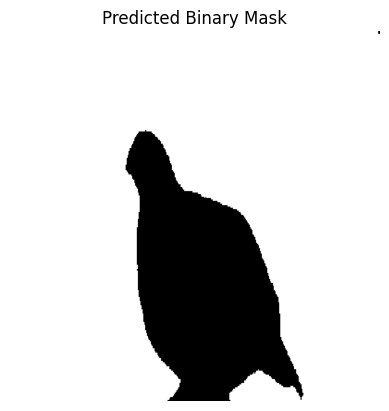

In [ ]:
plt.imshow(aggregated_mask/3 ,cmap='gray')
plt.title("Predicted Binary Mask")
plt.axis("off")
plt.show()

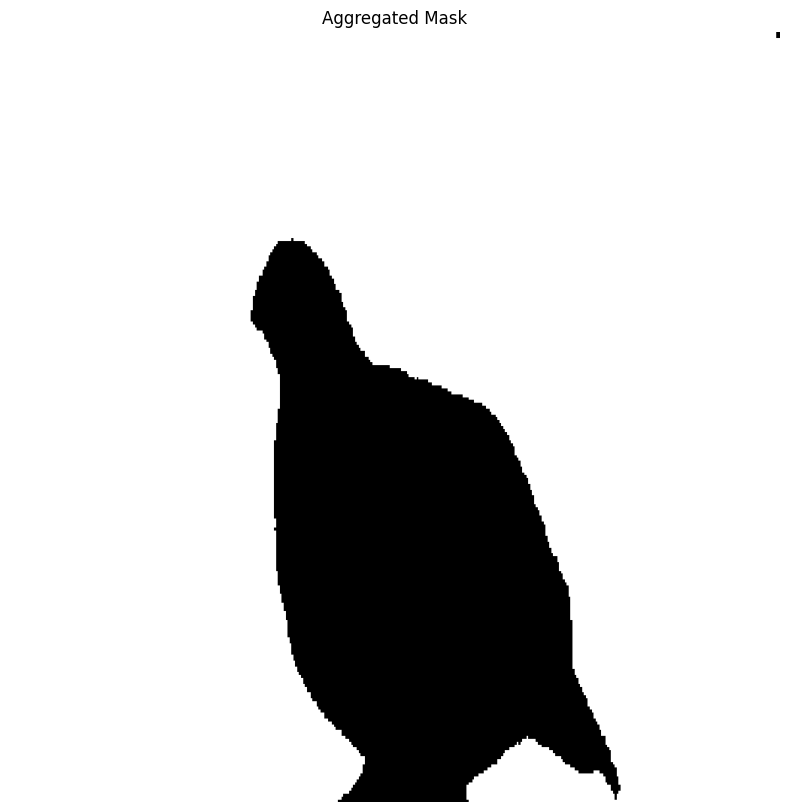

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(aggregated_mask, cmap='gray')
plt.title('Aggregated Mask')
plt.axis('off')
plt.show()

In [ ]:
ecssd_image_path = '/content/drive/MyDrive/ecssd_img/0164.jpg'
# img = Image.open(ecssd_image_path).convert("RGB")

NameError: name 'aggregated_mask' is not defined

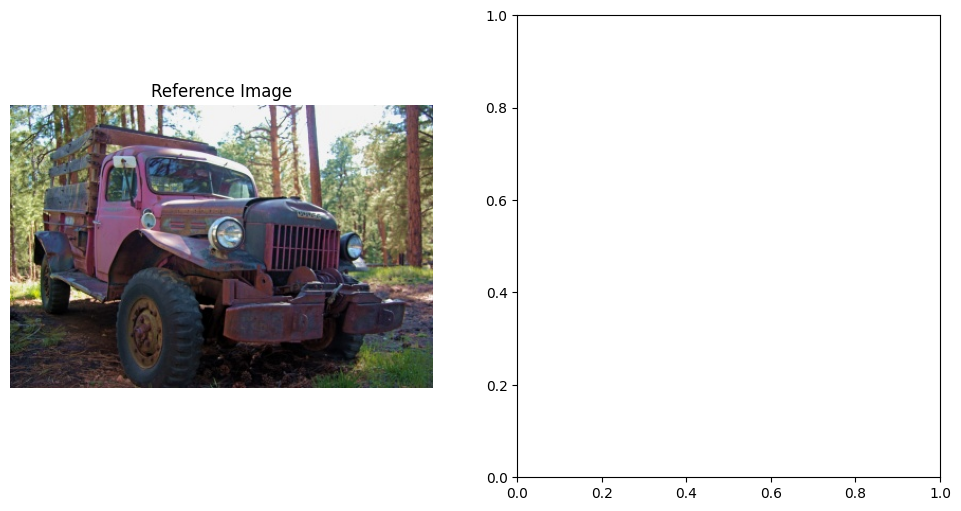

In [ ]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display reference image
    axes[0].imshow(img)
    axes[0].set_title("Reference Image")
    axes[0].axis("off")

    # Display aggregated mask
    axes[1].imshow(aggregated_mask, cmap='gray')
    axes[1].set_title("Aggregated Mask")
    axes[1].axis("off")

    plt.show()

In [ ]:
def get_preprocess_shape(oldh: int, oldw: int, long_side_length: int) -> Tuple[int, int]:
    """
    Compute the output size given input size and target long side length.
    """
    scale = long_side_length * 1.0 / max(oldh, oldw)
    newh, neww = oldh * scale, oldw * scale
    neww = int(neww + 0.5)
    newh = int(newh + 0.5)
    return (newh, neww)

def preprocess(x: torch.Tensor, pixel_mean=[123.675, 116.28, 103.53], pixel_std=[58.395, 57.12, 57.375], img_size=1024) -> torch.Tensor:
    """Normalize pixel values and pad to a square input."""

    pixel_mean = torch.Tensor(pixel_mean).view(-1, 1, 1)
    pixel_std = torch.Tensor(pixel_std).view(-1, 1, 1)

    # Normalize colors
    x = (x - pixel_mean) / pixel_std

    # Pad
    h, w = x.shape[-2:]
    padh = img_size - h
    padw = img_size - w
    x = F.pad(x, (0, padw, 0, padh))
    return x

def prepare_mask(image, target_length=1024):
  target_size = get_preprocess_shape(image.shape[0], image.shape[1], target_length)
  mask = np.array(resize(to_pil_image(image), target_size))

  input_mask = torch.as_tensor(mask)
  input_mask = input_mask.permute(2, 0, 1).contiguous()[None, :, :, :]

  input_mask = preprocess(input_mask)

  return input_mask
def point_selection(mask_sim, topk=1):
    # Top-1 point selection
    w, h = mask_sim.shape
    topk_xy = mask_sim.flatten(0).topk(topk)[1]
    topk_x = (topk_xy // h).unsqueeze(0)
    topk_y = (topk_xy - topk_x * h)
    topk_xy = torch.cat((topk_y, topk_x), dim=0).permute(1, 0)
    topk_label = np.array([1] * topk)
    topk_xy = topk_xy.cpu().numpy()

    # Top-last point selection
    last_xy = mask_sim.flatten(0).topk(topk, largest=False)[1]
    last_x = (last_xy // h).unsqueeze(0)
    last_y = (last_xy - last_x * h)
    last_xy = torch.cat((last_y, last_x), dim=0).permute(1, 0)
    last_label = np.array([0] * topk)
    last_xy = last_xy.cpu().numpy()

    return topk_xy, topk_label, last_xy, last_label


In [ ]:
# transform = T.Compose([
#     T.Resize((1024, 1024)),  # Resize images to 1024x1024
#     T.ToTensor(),
#     T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])
def get_preprocess_shape(oldh: int, oldw: int, long_side_length: int) -> Tuple[int, int]:
    """
    Compute the output size given input size and target long side length.
    """
    scale = long_side_length * 1.0 / max(oldh, oldw)
    newh, neww = oldh * scale, oldw * scale
    neww = int(neww + 0.5)
    newh = int(newh + 0.5)
    return (newh, neww)

def preprocess(x: torch.Tensor, pixel_mean=[123.675, 116.28, 103.53], pixel_std=[58.395, 57.12, 57.375], img_size=1024) -> torch.Tensor:
    """Normalize pixel values and pad to a square input."""

    pixel_mean = torch.Tensor(pixel_mean).view(-1, 1, 1)
    pixel_std = torch.Tensor(pixel_std).view(-1, 1, 1)

    # Normalize colors
    x = (x - pixel_mean) / pixel_std

    # Pad
    h, w = x.shape[-2:]
    padh = img_size - h
    padw = img_size - w
    x = F.pad(x, (0, padw, 0, padh))
    return x

def prepare_mask(image, target_length=1024):
    target_size = get_preprocess_shape(image.shape[0], image.shape[1], target_length)
    mask = np.array(resize(to_pil_image(image), target_size))

    input_mask = torch.as_tensor(mask)
    input_mask = input_mask.permute(2, 0, 1).contiguous()[None, :, :, :]

    input_mask = preprocess(input_mask)

    return input_mask

def point_selection(mask_sim, topk=1):
    # Top-1 point selection
    w, h = mask_sim.shape
    topk_xy = mask_sim.flatten(0).topk(topk)[1]
    topk_x = (topk_xy // h).unsqueeze(0)
    topk_y = (topk_xy - topk_x * h)
    topk_xy = torch.cat((topk_y, topk_x), dim=0).permute(1, 0)
    topk_label = np.array([1] * topk)
    topk_xy = topk_xy.cpu().numpy()

    # Top-last point selection
    last_xy = mask_sim.flatten(0).topk(topk, largest=False)[1]
    last_x = (last_xy // h).unsqueeze(0)
    last_y = (last_xy - last_x * h)
    last_xy = torch.cat((last_y, last_x), dim=0).permute(1, 0)
    last_label = np.array([0] * topk)
    last_xy = last_xy.cpu().numpy()

    return topk_xy, topk_label, last_xy, last_label


# Function to perform segmentation
def perform_segmentation(ref_image, ref_mask, test_image, model, processor, device):
    # ref_image_tensor = transform(ref_image).unsqueeze(0).to(device)
    pixel_values = processor(images=ref_image, return_tensors="pt").pixel_values
    with torch.no_grad():
        ref_feat = model.get_image_embeddings(pixel_values)
        ref_feat = ref_feat.squeeze().permute(1, 2, 0)

    ref_mask = prepare_mask(ref_mask)
    ref_mask = F.interpolate(ref_mask, size=ref_feat.shape[0:2], mode="bilinear")
    ref_mask = ref_mask.squeeze()[0]

    target_feat = ref_feat[ref_mask > 0]
    target_embedding = target_feat.mean(0).unsqueeze(0)
    target_embedding = target_embedding / target_embedding.norm(dim=-1, keepdim=True)
    target_embedding = target_embedding.unsqueeze(0)


    inputs = processor(images=test_image, return_tensors="pt").to(device)
    pixel_values = inputs.pixel_values

    with torch.no_grad():
        test_feat = model.get_image_embeddings(pixel_values).squeeze()

    height, width, num_channels = test_feat.shape
    test_feat = test_feat / test_feat.norm(dim=-1, keepdim=True)
    test_feat_reshaped = test_feat.view(height * width, num_channels)
    sim = target_feat @ test_feat_reshaped

    sim = sim.view(1, 1, height, width)
    sim = F.interpolate(sim, scale_factor=4, mode="bilinear")
    sim = processor.post_process_masks(sim.unsqueeze(1), original_sizes=inputs["original_sizes"].tolist(), reshaped_input_sizes=inputs["reshaped_input_sizes"].tolist(),
                                   binarize=False)

    sim = sim[0].squeeze()

    topk_xy_i, topk_label_i, last_xy_i, last_label_i = point_selection(sim, topk=1)
    topk_xy = np.concatenate([topk_xy_i, last_xy_i], axis=0)
    topk_label = np.concatenate([topk_label_i, last_label_i], axis=0)

    sim = (sim - sim.mean()) / torch.std(sim)
    sim = F.interpolate(sim.unsqueeze(0).unsqueeze(0), size=(64, 64), mode="bilinear")
    attention_similarity = sim.sigmoid().unsqueeze(0).flatten(3)

    inputs = processor(test_image, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model(
            input_points=inputs.input_points,
            input_labels=inputs.input_labels,
            image_embeddings=test_feat.unsqueeze(0),
            multimask_output=False,
            attention_similarity=attention_similarity,
            target_embedding=target_embedding
        )
        best_idx = 0

    with torch.no_grad():
        outputs_1 = model(
            input_points=inputs.input_points,
            input_labels=inputs.input_labels,
            input_masks=outputs.pred_masks.squeeze(1)[best_idx: best_idx + 1, :, :],
            image_embeddings=test_feat.unsqueeze(0),
            multimask_output=True
        )

    masks = processor.image_processor.post_process_masks(outputs_1.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()
    best_idx = torch.argmax(outputs_1.iou_scores).item()
    y, x = np.nonzero(masks[best_idx])
    x_min = x.min()
    x_max = x.max()
    y_min = y.min()
    y_max = y.max()
    input_boxes = [[[x_min, y_min, x_max, y_max]]]

    inputs = processor(test_image, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], input_boxes=input_boxes, return_tensors="pt").to(device)
    final_outputs = model(
        input_points=inputs.input_points,
        input_labels=inputs.input_labels,
        input_boxes=inputs.input_boxes,
        input_masks=outputs_1.pred_masks.squeeze(1)[:, best_idx: best_idx + 1, :, :],
        image_embeddings=test_feat.unsqueeze(0),
        multimask_output=True
    )

    masks = processor.image_processor.post_process_masks(final_outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()
    best_idx = torch.argmax(final_outputs.iou_scores).item()
    fig, axes = plt.subplots()
    mask = masks[best_idx]
    h, w = mask.shape[-2:]
    color = np.array([255, 0, 0, 0.6])  # Red color
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)

    return mask_image



In [ ]:
def perform_segmentation(ref_image, ref_mask, test_image, model, processor, device):
  pixel_values = processor(images=ref_image, return_tensors="pt").pixel_values.to(device)
  with torch.no_grad():
    ref_feat = model.get_image_embeddings(pixel_values)
    ref_feat = ref_feat.squeeze().permute(1, 2, 0)
  ref_mask = prepare_mask(ref_mask)
  ref_mask = F.interpolate(ref_mask, size=ref_feat.shape[0: 2], mode="bilinear")
  ref_mask = ref_mask.squeeze()[0]

  # Step 3: Target feature extraction
  target_feat = ref_feat[ref_mask > 0]
  target_embedding = target_feat.mean(0).unsqueeze(0)
  target_feat = target_embedding / target_embedding.norm(dim=-1, keepdim=True)
  target_embedding = target_embedding.unsqueeze(0)

  inputs = processor(images=test_image, return_tensors="pt").to(device)
  pixel_values = inputs.pixel_values

  # image feature encoding
  with torch.no_grad():
    test_feat = model.get_image_embeddings(pixel_values).squeeze()

  num_channels, height, width = test_feat.shape
  test_feat = test_feat / test_feat.norm(dim=0, keepdim=True)
  test_feat_reshaped = test_feat.reshape(num_channels, height * width)
  sim = target_feat @ test_feat_reshaped

  sim = sim.reshape(1, 1, height, width)
  sim = F.interpolate(sim, scale_factor=4, mode="bilinear")
  sim = processor.post_process_masks(sim.unsqueeze(1), original_sizes=inputs["original_sizes"].tolist(), reshaped_input_sizes=inputs["reshaped_input_sizes"].tolist(),
                                    binarize=False)
  sim = sim[0].squeeze()
  # Positive-negative location prior
  topk_xy_i, topk_label_i, last_xy_i, last_label_i = point_selection(sim, topk=1)
  topk_xy = np.concatenate([topk_xy_i, last_xy_i], axis=0)
  topk_label = np.concatenate([topk_label_i, last_label_i], axis=0)

  # Obtain the target guidance for cross-attention layers
  sim = (sim - sim.mean()) / torch.std(sim)
  sim = F.interpolate(sim.unsqueeze(0).unsqueeze(0), size=(64, 64), mode="bilinear")
  attention_similarity = sim.sigmoid_().unsqueeze(0).flatten(3)

  inputs = processor(test_image, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], return_tensors="pt").to(device)

  # First-step prediction
  with torch.no_grad():
    outputs = model(
        input_points=inputs.input_points,
        input_labels=inputs.input_labels,
        image_embeddings=test_feat.unsqueeze(0),
        multimask_output=False,
        attention_similarity=attention_similarity,  # Target-guided Attention
        target_embedding=target_embedding  # Target-semantic Prompting
    )
    best_idx = 0

  # Cascaded Post-refinement-1
  with torch.no_grad():
    outputs_1 = model(
                input_points=inputs.input_points,
                input_labels=inputs.input_labels,
                input_masks=outputs.pred_masks.squeeze(1)[best_idx: best_idx + 1, :, :],
                image_embeddings=test_feat.unsqueeze(0),
                multimask_output=True)

  # Cascaded Post-refinement-2
  masks = processor.image_processor.post_process_masks(outputs_1.pred_masks.cpu(),
                                                      inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()

  best_idx = torch.argmax(outputs_1.iou_scores).item()
  y, x = np.nonzero(masks[best_idx])
  x_min = x.min()
  x_max = x.max()
  y_min = y.min()
  y_max = y.max()
  input_boxes = [[[x_min, y_min, x_max, y_max]]]

  inputs = processor(test_image, input_points=[topk_xy.tolist()], input_labels=[topk_label.tolist()], input_boxes=input_boxes,
                    return_tensors="pt").to(device)

  final_outputs = model(
      input_points=inputs.input_points,
      input_labels=inputs.input_labels,
      input_boxes=inputs.input_boxes,
      input_masks=outputs_1.pred_masks.squeeze(1)[:,best_idx: best_idx + 1, :, :],
      image_embeddings=test_feat.unsqueeze(0),
      multimask_output=True)
  masks = processor.image_processor.post_process_masks(final_outputs.pred_masks.cpu(),
                                                      inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())[0].squeeze().numpy()

  mask = masks[best_idx]
  h, w = mask.shape[-2:]
  color = np.array([255, 0, 0, 0.6])  # Red color
  mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
  red_channel = mask_image[:, :, 0]  # Extract the red channel

  binary_mask = (red_channel > 0.9 * 255).astype(np.uint8) * 255


  return binary_mask


In [ ]:
ecssd_image_path='/content/drive/MyDrive/ecssd_img/0063.jpg'
ecssd_image_name = os.path.basename(ecssd_image_path)

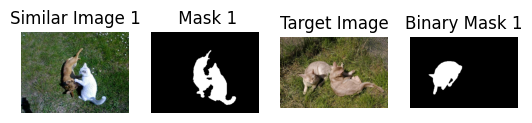

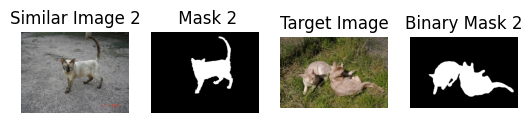

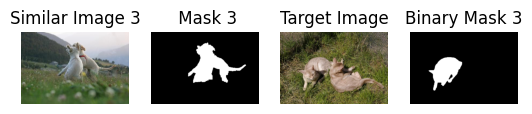

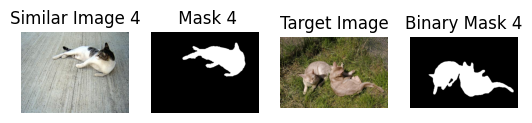

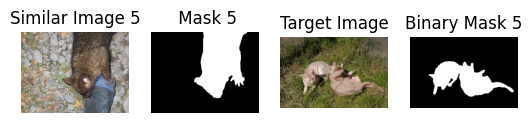

In [ ]:
masks_list = []
similar_images = get_top_k_similar_images_by_name(ecssd_image_name, 5)
img = Image.open(ecssd_image_path).convert("RGB").convert("RGB")
# aggregated_mask = np.zeros((1024, 1024), dtype=np.float32)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

for idx, similar_image_name in enumerate(similar_images):
    similar_image_path = os.path.join("/content/drive/MyDrive/IMAGE", similar_image_name)
    similar_mask_path = os.path.join("/content/drive/MyDrive/MASK ", similar_image_name.replace('.jpg', '.png'))
    similar_image = Image.open(similar_image_path).convert("RGB")
    similar_mask = cv2.imread(similar_mask_path)
    similar_mask = cv2.cvtColor(similar_mask, cv2.COLOR_BGR2RGB)

    binary_mask = perform_segmentation(similar_image, similar_mask, img, model, processor, device)
    masks_list.append(binary_mask)
    plt.figure()

    # Display ECSSD image
    plt.subplot(1, 4, 1)
    plt.imshow(similar_image)
    plt.title(f'Similar Image {idx+1}')
    plt.axis('off')

    # Display binary mask
    plt.subplot(1, 4, 2)
    plt.imshow(similar_mask, cmap='gray')
    plt.title(f' Mask {idx + 1}')
    plt.axis('off')
    plt.subplot(1, 4, 3)
    plt.imshow(img)
    plt.title('Target Image')
    plt.axis('off')
    plt.subplot(1, 4, 4)
    plt.imshow(binary_mask, cmap='gray')
    plt.title(f'Binary Mask {idx + 1}')
    plt.axis('off')
    plt.show()


aggregated_mask = np.mean(masks_list, axis=0)

# Convert the averaged mask to binary
# binary_aggregated_mask = (aggregated_mask > 0.5).astype(np.uint8) * 255

save_path = f"/content/drive/MyDrive/pseudo_labels/{os.path.splitext(ecssd_image_name)[0]}.png"
plt.imsave(save_path, aggregated_mask, cmap='gray')


In [ ]:
def generate_pseudo_labels_for_ecssd(ecssd_images_dir, save_dir, model, processor, device, k=5):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    ecssd_images = [f for f in os.listdir(ecssd_images_dir) if f.endswith('.jpg')][988:]
    model.to(device)
    for ecssd_image_name in ecssd_images:
        ecssd_image_path = os.path.join(ecssd_images_dir, ecssd_image_name)
        similar_images = get_top_k_similar_images_by_name(ecssd_image_name, k)
        img = Image.open(ecssd_image_path).convert("RGB").convert("RGB")
        masks_list = []

        for idx, similar_image_name in enumerate(similar_images):
            similar_image_path = os.path.join("/content/drive/MyDrive/IMAGE", similar_image_name)
            similar_mask_path = os.path.join("/content/drive/MyDrive/MASK ", similar_image_name.replace('.jpg', '.png'))
            similar_image = Image.open(similar_image_path).convert("RGB")
            similar_mask = cv2.imread(similar_mask_path)
            similar_mask = cv2.cvtColor(similar_mask, cv2.COLOR_BGR2RGB)
            binary_mask = perform_segmentation(similar_image, similar_mask, img, model, processor, device)
            masks_list.append(binary_mask)
            plt.figure()
            plt.subplot(1, 4, 1)
            plt.imshow(similar_image)
            plt.title(f'Similar Image {idx+1}')
            plt.axis('off')
            plt.subplot(1, 4, 2)
            plt.imshow(similar_mask, cmap='gray')
            plt.title(f' Mask {idx + 1}')
            plt.axis('off')
            plt.subplot(1, 4, 3)
            plt.imshow(img)
            plt.title('Target Image')
            plt.axis('off')
            plt.subplot(1, 4, 4)
            plt.imshow(binary_mask, cmap='gray')
            plt.title(f'Binary Mask {idx + 1}')
            plt.axis('off')
            plt.show()

        aggregated_mask = np.mean(masks_list, axis=0)
        save_path = os.path.join(save_dir, f"{os.path.splitext(ecssd_image_name)[0]}.png")
        plt.imsave(save_path, aggregated_mask, cmap='gray')

# Paths
ecssd_images_dir = '/content/drive/MyDrive/ecssd_img'
save_dir = '/content/drive/MyDrive/pseudo_labels'


# Generate pseudo labels for each image in ECSSD dataset


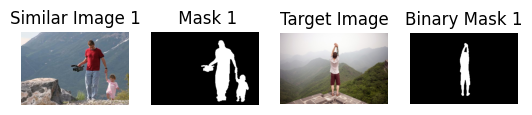

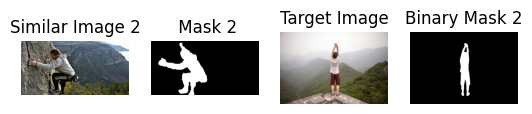

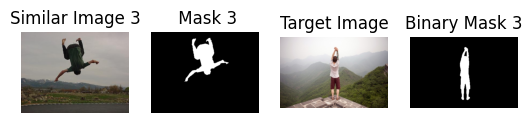

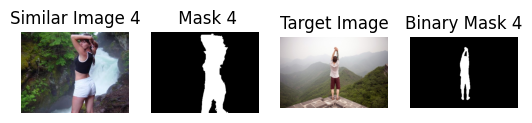

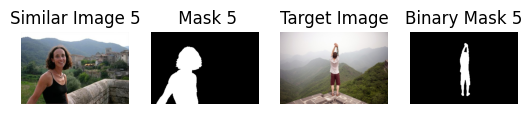

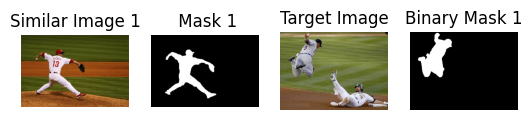

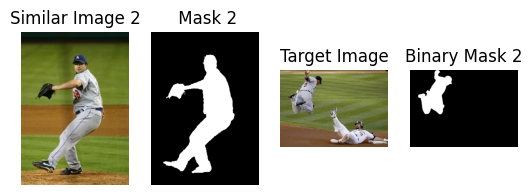

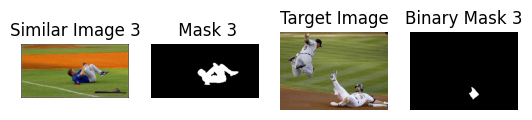

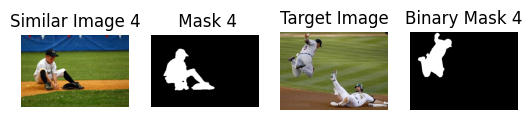

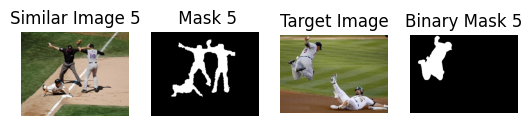

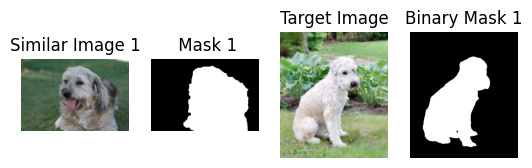

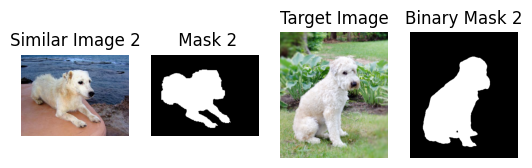

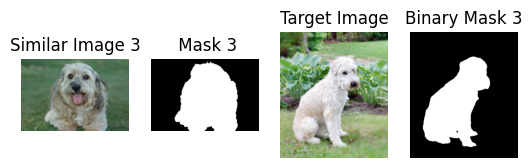

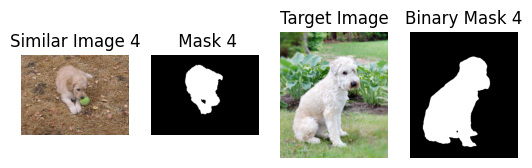

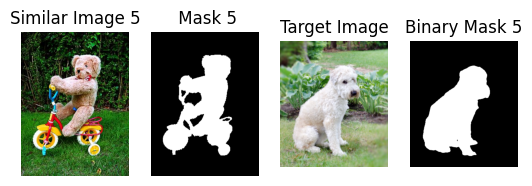

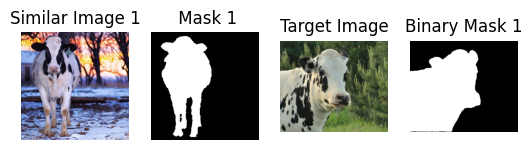

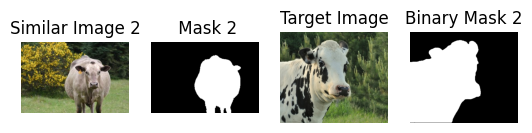

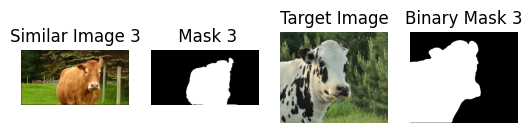

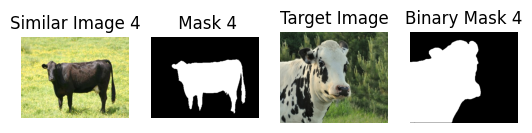

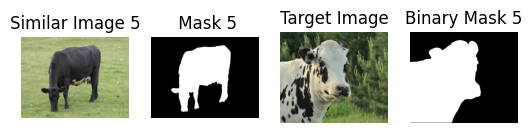

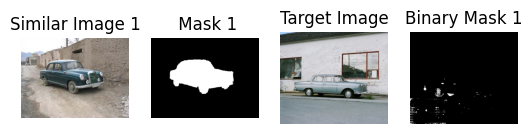

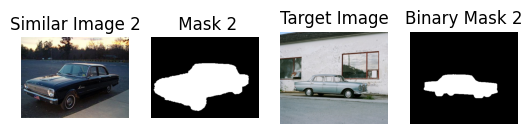

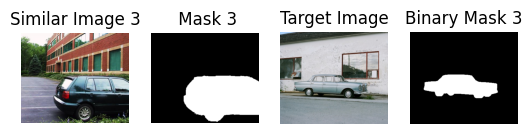

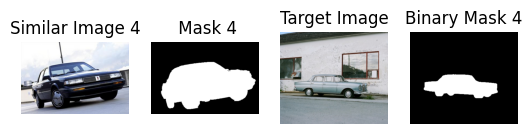

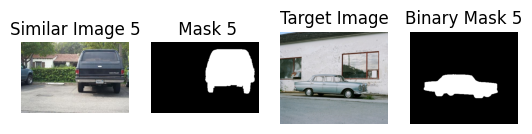

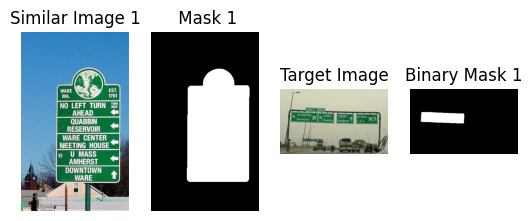

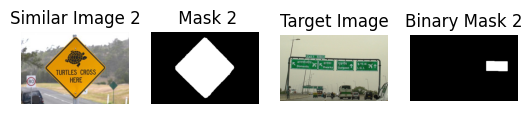

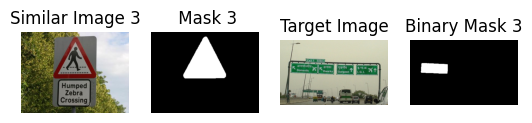

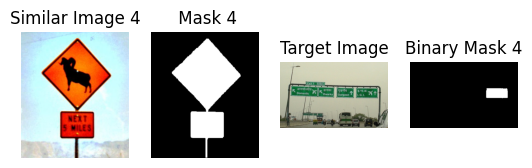

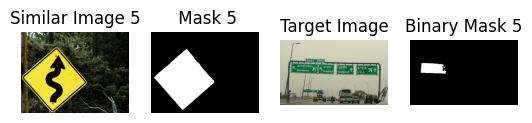

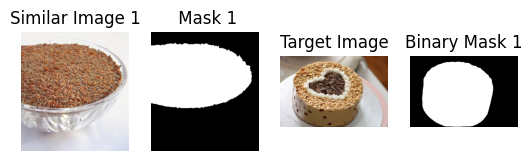

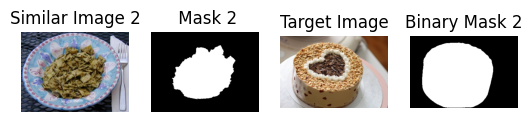

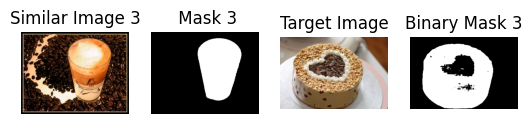

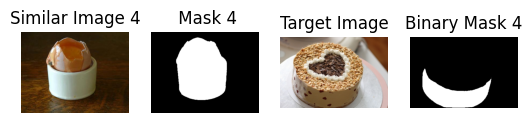

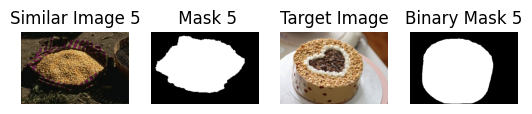

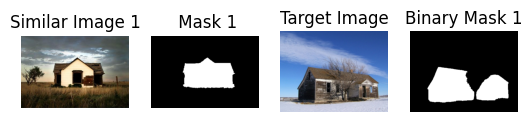

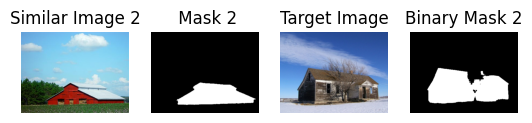

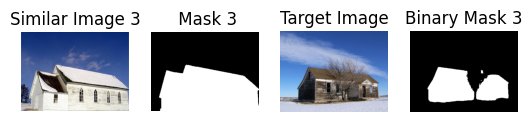

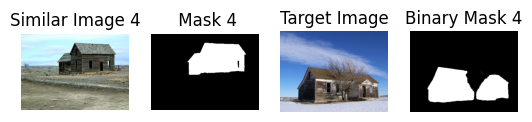

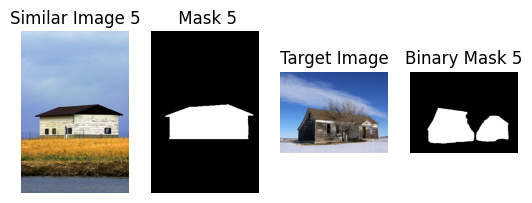

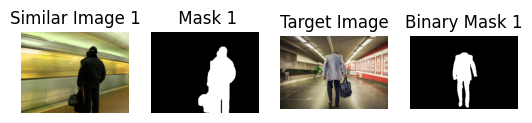

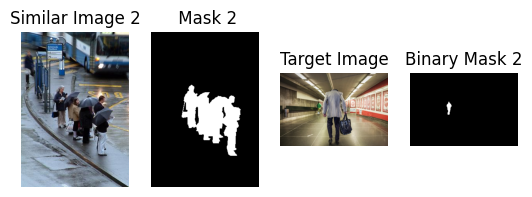

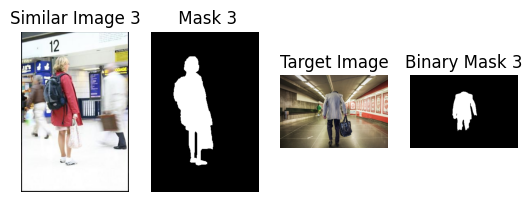

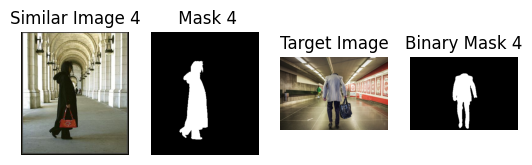

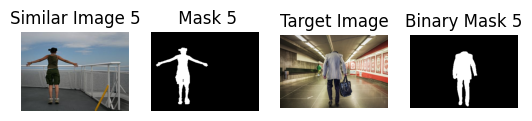

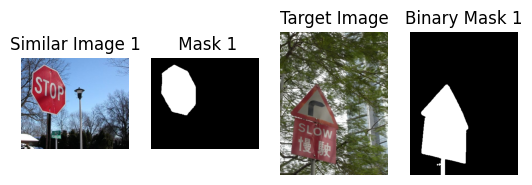

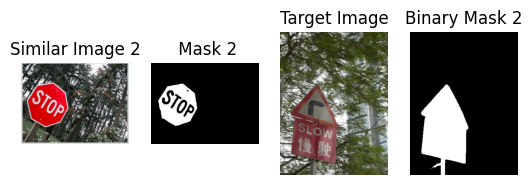

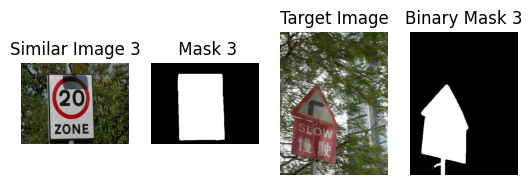

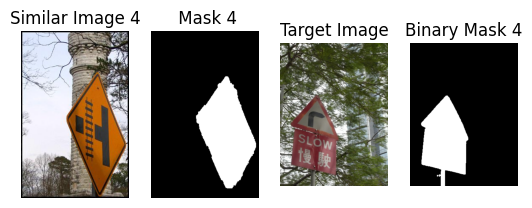

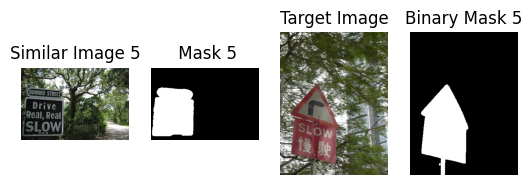

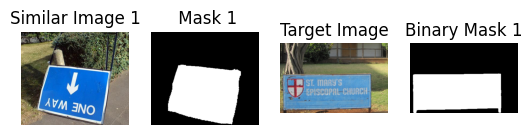

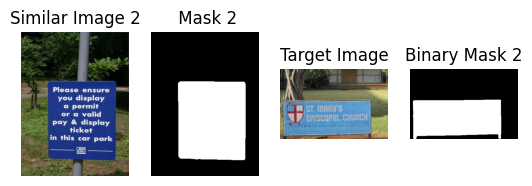

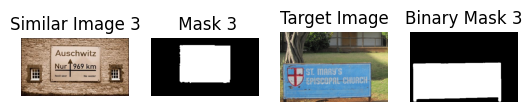

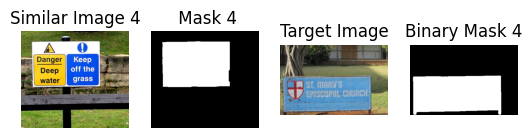

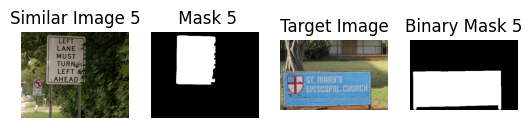

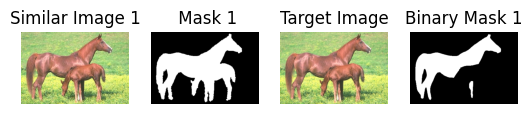

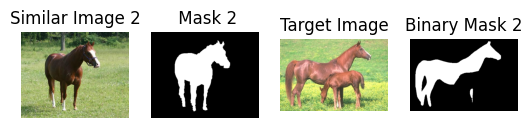

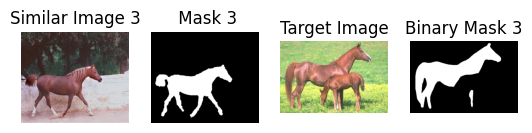

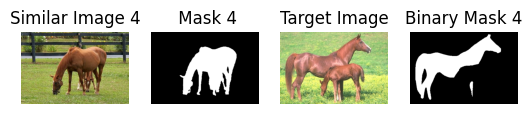

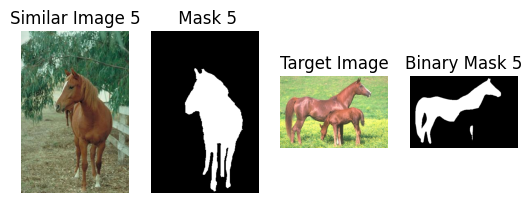

In [ ]:
generate_pseudo_labels_for_ecssd(ecssd_images_dir, save_dir, model, processor, device, k=5)

In [ ]:
path='/content/drive/MyDrive/pseudo_labels'
import os

def count_files_in_folder(folder_path):
    try:
        file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        return file_count
    except Exception as e:
        return str(e)


file_count = count_files_in_folder(path)
print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 1000


In [ ]:
VGG_MEAN = [103.939, 116.779, 123.68]

class Vgg16:
    def __init__(self, vgg16_npy_path=None):
        if vgg16_npy_path is None:
            path = sys.modules[self.__class__.__module__].__file__
            path = os.path.abspath(os.path.join(path, os.pardir))
            path = os.path.join(path, "vgg16.npy")
            print(path)
            vgg16_npy_path = path
        self.data_dict = np.load(vgg16_npy_path, allow_pickle=True).item()
        print("npy file loaded")

    def build(self, input, train=False):
        self.conv1_1 = self._conv_layer(input, "conv1_1")
        self.conv1_2 = self._conv_layer(self.conv1_1, "conv1_2")
        self.pool1 = self._max_pool(self.conv1_2, 'pool1')

        self.conv2_1 = self._conv_layer(self.pool1, "conv2_1")
        self.conv2_2 = self._conv_layer(self.conv2_1, "conv2_2")
        self.pool2 = self._max_pool(self.conv2_2, 'pool2')

        self.conv3_1 = self._conv_layer(self.pool2, "conv3_1")
        self.conv3_2 = self._conv_layer(self.conv3_1, "conv3_2")
        self.conv3_3 = self._conv_layer(self.conv3_2, "conv3_3")
        self.pool3 = self._max_pool(self.conv3_3, 'pool3')

        self.conv4_1 = self._conv_layer(self.pool3, "conv4_1")
        self.conv4_2 = self._conv_layer(self.conv4_1, "conv4_2")
        self.conv4_3 = self._conv_layer(self.conv4_2, "conv4_3")
        self.pool4 = self._max_pool(self.conv4_3, 'pool4')

        self.conv5_1 = self._conv_layer(self.pool4, "conv5_1")
        self.conv5_2 = self._conv_layer(self.conv5_1, "conv5_2")
        self.conv5_3 = self._conv_layer(self.conv5_2, "conv5_3")
        self.pool5 = self._max_pool(self.conv5_3, 'pool5')

    def _max_pool(self, bottom, name):
        return tf.nn.max_pool(bottom, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name=name)

    def _conv_layer(self, bottom, name):
        with tf.variable_scope(name):
            filt = self.get_conv_filter(name)
            conv = tf.nn.conv2d(bottom, filt, [1, 1, 1, 1], padding='SAME')
            conv_biases = self.get_bias(name)
            bias = tf.nn.bias_add(conv, conv_biases)
            relu = tf.nn.relu(bias)
            return relu

    def get_conv_filter(self, name):
        return tf.Variable(self.data_dict[name][0], name="filter")

    def get_bias(self, name):
        return tf.Variable(self.data_dict[name][1], name="biases")

In [ ]:
import tensorflow as tf
import vgg16

class NLDF:
    img_size = 224
    label_size = 224

    def __init__(self):
        self.input_holder = tf.placeholder(tf.float32, [None, self.img_size, self.img_size, 3])
        self.label_holder = tf.placeholder(tf.float32, [None, self.label_size * self.label_size, 2])
        self.build_model()

    def build_model(self):
        vgg = vgg16.Vgg16()
        vgg.build(self.input_holder)

        conv5_3 = vgg.conv5_3
        conv4_3 = vgg.conv4_3
        conv3_3 = vgg.conv3_3

        # Additional layers for NLDF
        self.side_5 = self.side_layer(conv5_3, "side_5")
        self.side_4 = self.side_layer(conv4_3, "side_4")
        self.side_3 = self.side_layer(conv3_3, "side_3")

        self.fuse = self.fuse_layer(self.side_5, self.side_4, self.side_3)
        self.output = tf.nn.softmax(self.fuse, axis=-1)

        self.Loss_Mean = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.output, labels=self.label_holder))
        self.correct_pred = tf.equal(tf.argmax(self.output, 1), tf.argmax(self.label_holder, 1))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_pred, tf.float32))

    def side_layer(self, bottom, name):
        with tf.variable_scope(name):
            side = tf.layers.conv2d(bottom, 1, (1, 1), padding='same', activation=tf.nn.relu)
            side = tf.image.resize_images(side, [self.img_size, self.img_size])
            return side

    def fuse_layer(self, side_5, side_4, side_3):
        with tf.variable_scope('fuse'):
            fuse = tf.concat([side_5, side_4, side_3], axis=3)
            fuse = tf.layers.conv2d(fuse, 1, (1, 1), padding='same', activation=None)
            fuse = tf.image.resize_images(fuse, [self.label_size, self.label_size])
            return fuse

    def load_weights(self, sess, weight_file):
        saver = tf.train.Saver()
        saver.restore(sess, weight_file)


ModuleNotFoundError: No module named 'vgg16'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import numpy as np
import os

# Define paths
pseudo_labels_path = '/content/drive/MyDrive/pseudo_labels'  # Path where pseudo labels are extracted
images_path = '/content/drive/MyDrive/ecssd_img'  # Path where images are extracted

# Verify the directory structure
print("Pseudo Labels Directory:", os.listdir(pseudo_labels_path))
print("Images Directory:", os.listdir(images_path))

# Define a custom dataset
class ECSSDDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.images = sorted(os.listdir(images_dir))
        self.labels = sorted(os.listdir(labels_dir))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.images[idx])
        label_path = os.path.join(self.labels_dir, self.labels[idx])

        image = Image.open(image_path).convert("RGB")
        label = Image.open(label_path).convert("L")

        if self.transform:
            image = self.transform(image)
            label = self.transform(label)

        return image, label

# Data transformations
transform = transforms.Compose([
    transforms.Resize((352, 352)),
    transforms.ToTensor(),
])

# Create dataset and dataloader
dataset = ECSSDDataset(images_path, pseudo_labels_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Load pre-trained NLDF model
class NLDF(nn.Module):
    def __init__(self):
        super(NLDF, self).__init__()
        self.backbone = models.vgg16(pretrained=True).features
        self.conv1 = nn.Conv2d(512, 256, 3, padding=1)
        self.conv2 = nn.Conv2d(256, 1, 1)

    def forward(self, x):
        x = self.backbone(x)
        x = self.conv1(x)
        x = self.conv2(x)
        return torch.sigmoid(x)

model = NLDF()

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Uncertainty-Aware Pseudo-Label Learning
def train(model, dataloader, criterion, optimizer, num_epochs=6):
    model.train()
    for epoch in range(num_epochs):
        for images, labels in dataloader:
            # Forward pass
            outputs = model(images)

            # Calculate uncertainty
            uncertainty = torch.var(outputs, dim=1, keepdim=True)

            # Resize uncertainty to match the output dimensions
            uncertainty_resized = nn.functional.interpolate(uncertainty, size=(352, 352), mode='bilinear', align_corners=False)

            # Select samples based on uncertainty
            low_uncertainty_mask = uncertainty_resized < torch.mean(uncertainty_resized)

            # Ensure the mask matches the size of outputs and labels
            low_uncertainty_mask = low_uncertainty_mask.expand_as(outputs)

            selected_labels = labels[low_uncertainty_mask].view(-1, 352, 352)
            selected_outputs = outputs[low_uncertainty_mask].view(-1, 352, 352)

            # Reweight pseudo-labels based on uncertainty
            weights = torch.exp(-uncertainty_resized)
            weights = weights[low_uncertainty_mask].view(-1, 352, 352)
            weighted_labels = selected_labels * weights

            # Compute loss
            loss = criterion(selected_outputs, weighted_labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Train the model
train(model, dataloader, criterion, optimizer)

# Save the trained model
torch.save(model.state_dict(), 'nldf_adapted.pth')

# Find labels for the ECSSD dataset using the adapted NLDF model
def find_labels(model, dataloader, output_dir):
    model.eval()
    os.makedirs(output_dir, exist_ok=True)

    with torch.no_grad():
        for idx, (images, _) in enumerate(dataloader):
            outputs = model(images)
            outputs = (outputs > 0.5).float()  # Binarize output

            for i in range(outputs.size(0)):
                output = outputs[i].cpu().numpy().squeeze()
                output_image = Image.fromarray((output * 255).astype(np.uint8))
                output_image.save(os.path.join(output_dir, f'label_{idx * dataloader.batch_size + i + 1}.png'))

# Define output directory for labels
output_dir = '/content/drive/MyDrive/labels_ecssd'

# Create a new DataLoader for inference
inference_dataset = ECSSDDataset(images_path, pseudo_labels_path, transform=transform)
inference_dataloader = DataLoader(inference_dataset, batch_size=1, shuffle=False)

# Find and save labels for the ECSSD dataset
find_labels(model, inference_dataloader, output_dir)


Pseudo Labels Directory: ['0011.png', '0012.png', '0009.png', '0014.png', '0006.png', '0004.png', '0013.png', '0002.png', '0005.png', '0003.png', '0008.png', '0001.png', '0010.png', '0035.png', '0031.png', '0032.png', '0028.png', '0029.png', '0027.png', '0016.png', '0021.png', '0034.png', '0018.png', '0022.png', '0025.png', '0019.png', '0023.png', '0039.png', '0036.png', '0017.png', '0015.png', '0038.png', '0030.png', '0026.png', '0037.png', '0020.png', '0024.png', '0033.png', '0040.png', '0056.png', '0053.png', '0041.png', '0044.png', '0051.png', '0061.png', '0054.png', '0048.png', '0060.png', '0042.png', '0052.png', '0055.png', '0043.png', '0085.png', '0094.png', '0077.png', '0073.png', '0090.png', '0092.png', '0070.png', '0089.png', '0080.png', '0095.png', '0076.png', '0084.png', '0083.png', '0075.png', '0078.png', '0087.png', '0093.png', '0081.png', '0072.png', '0088.png', '0066.png', '0069.png', '0091.png', '0082.png', '0067.png', '0068.png', '0074.png', '0079.png', '0086.png', '0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 232MB/s]
<ipython-input-2-22694fcfbd5e>:82: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally a

RuntimeError: The expanded size of the tensor (11) must match the existing size (352) at non-singleton dimension 3.  Target sizes: [8, 1, 11, 11].  Tensor sizes: [8, 1, 352, 352]

In [ ]:
import os

# Define paths
pseudo_labels_path = '/content/drive/MyDrive/pseudo_labels'
images_path = '/content/drive/MyDrive/ecssd_img'

# List contents of the directories to verify the paths
print("Pseudo Labels Directory:", os.listdir(pseudo_labels_path))
print("Images Directory:", os.listdir(images_path))


Pseudo Labels Directory: ['0011.png', '0012.png', '0009.png', '0014.png', '0006.png', '0004.png', '0013.png', '0002.png', '0005.png', '0003.png', '0008.png', '0001.png', '0010.png', '0035.png', '0031.png', '0032.png', '0028.png', '0029.png', '0027.png', '0016.png', '0021.png', '0034.png', '0018.png', '0022.png', '0025.png', '0019.png', '0023.png', '0039.png', '0036.png', '0017.png', '0015.png', '0038.png', '0030.png', '0026.png', '0037.png', '0020.png', '0024.png', '0033.png', '0040.png', '0056.png', '0053.png', '0041.png', '0044.png', '0051.png', '0061.png', '0054.png', '0048.png', '0060.png', '0042.png', '0052.png', '0055.png', '0043.png', '0085.png', '0094.png', '0077.png', '0073.png', '0090.png', '0092.png', '0070.png', '0089.png', '0080.png', '0095.png', '0076.png', '0084.png', '0083.png', '0075.png', '0078.png', '0087.png', '0093.png', '0081.png', '0072.png', '0088.png', '0066.png', '0069.png', '0091.png', '0082.png', '0067.png', '0068.png', '0074.png', '0079.png', '0086.png', '0

In [ ]:
import subprocess
import sys

def install_packages():
    packages = [
        "torch",
        "torchvision",
        "tensorflow",
        "opencv-python",
        "apex",
        "tensorboard",
        "argparse"
    ]

    for package in packages:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

if __name__ == "__main__":
    install_packages()


In [ ]:
!git clone https://github.com/NVIDIA/apex
%cd apex
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" .


Cloning into 'apex'...
remote: Enumerating objects: 11809, done.
remote: Counting objects: 100% (3877/3877), done.
remote: Compressing objects: 100% (663/663), done.
remote: Total 11809 (delta 3437), reused 3380 (delta 3208), pack-reused 7932
Receiving objects: 100% (11809/11809), 15.55 MiB | 8.14 MiB/s, done.
Resolving deltas: 100% (8266/8266), done.
/content/apex
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
DEPRECATION: --build-option and --global-option are deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859
Processing /content/apex
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.1 MB/s eta 0:00:00
    Getting requirements to build wheel: started
    Running command Gett

In [ ]:
# #!/usr/bin/python3
# #coding=utf-8

# import datetime
# import shutil
# import os
# import cv2
# import numpy as np
# import tensorflow as tf
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torchvision
# from torch.utils.data import DataLoader
# from torch.utils.tensorboard import SummaryWriter
# from apex import amp
# import argparse
# import logging
# import time
# import copy
# import json
# from pathlib import Path

# from odel_wrappers.base_wrapper import Base_Wrappepr  # Assuming it wraps NLDF
# from lib.misc import get_config_str, setup_logger, AverageMeter, ProgressMeter, save_checkpoint, set_seed, get_exp_name
# from lib.exp_logging import make_train_img_grid
# from lib.dataset import MixSTData
# from lib.misc import get_pse_portion_list
# from lib.evalualtion import get_models_name, test
# from lib.pipeline_ops import update_dataset, setup_pse_test_loader, create_model
# from config.defaults import get_cfg_defaults
# import NLDF
# import vgg16

# def parse_aug():
#     parser = argparse.ArgumentParser(description='PyTorch Training')

#     parser.add_argument('--resume', action="store_true", help='resume from checkpoint')
#     parser.add_argument('--exp_config', type=str, default='', help='exp config file')
#     parser.add_argument('--extra', type=str, default='', help='exp config file')
#     parser.add_argument('/content/drive/MyDrive/pseudo_labels', type=str, default='', help='path to pseudo labels')
#     parser.add_argument('/content/drive/MyDrive/labels_ecssd', type=str, default='', help='path to save outputs')
#     parser.add_argument(
#         "opts",
#         help="Modify config options using the command-line",
#         default=None,
#         nargs=argparse.REMAINDER,
#     )

#     args = parser.parse_args()
#     return args

# def epoch2round(epoch, cfg):
#     multi_steps = [cfg.SOLVER.WARMUP_EPOCH + cfg.SOLVER.EPOCH_PER_ROUND * i for i in range(cfg.SOLVER.ROUND_NUM - 1)]
#     for idx in range(len(multi_steps)):
#         if epoch <= multi_steps[idx]:  # epoch start from 1, round start from 0
#             return idx
#     return len(multi_steps)

# def load_pseudo_labels(pseudo_label_path):
#     pseudo_labels = {}
#     for fname in os.listdir(pseudo_label_path):
#         if fname.endswith('.png') or fname.endswith('.jpg'):
#             img_path = os.path.join(pseudo_label_path, fname)
#             pseudo_labels[fname] = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#     return pseudo_labels

# def train(train_loader, test_loaders, model_wrapper: Base_Wrappepr, cfg=None):

#     global_step = cfg.global_step
#     tb_writer: SummaryWriter = cfg.tb_writer
#     best_mae = cfg.best_mae
#     best_sm = cfg.best_sm
#     best_epoch_sm = 0
#     best_epoch_mae = 0
#     model = model_wrapper.model

#     def get_next_batch(my_iter, loader, device):
#         try:
#             bat = my_iter.next()
#         except:
#             logging.info(f"finish reading all {len(loader.dataset)} samples in dataset, reload iterator")
#             my_iter = iter(loader)
#             bat = my_iter.next()
#         return [item.to(device) for item in bat], my_iter

#     current_round = cfg.start_round
#     data_iter = iter(train_loader)

#     for epoch in range(cfg.start_epoch, cfg.epoch + 1):  # epoch starts from 1
#         model.train(True)
#         batch_time = AverageMeter('Time', ':6.3f')
#         data_time = AverageMeter('Data', ':6.3f')
#         baselr_rec = AverageMeter('BaseLR', ':.4e')
#         headlr_rec = AverageMeter('HeadLR', ':.4e')
#         losses = AverageMeter('Loss', ':.4e')

#         progress = ProgressMeter(
#             cfg.SOLVER.ITER_PER_EPOCH,
#             [batch_time, data_time, baselr_rec, baselr_rec, losses],
#             prefix="Epoch: [{}]".format(epoch)
#         )
#         end = time.time()

#         for step in range(cfg.SOLVER.ITER_PER_EPOCH):
#             bat, data_iter = get_next_batch(data_iter, train_loader, 'cuda')
#             data_time.update(time.time() - end)  # data time

#             image, mask, body, detail, var = bat

#             out_dict = model_wrapper.handle_batch(bat, global_step=global_step)
#             loss = out_dict['loss']

#             losses.update(loss)
#             baselr_rec.update(model_wrapper.optimizer.param_groups[0]['lr'])
#             headlr_rec.update(model_wrapper.optimizer.param_groups[1]['lr'])
#             batch_time.update(time.time() - end)
#             end = time.time()

#             if global_step % cfg.SOLVER.IMG_RECORD_INTERVAL == 0:
#                 in_im = make_train_img_grid(image, un_norm=True, num_colum=1)  # c,h,w
#                 in_gt = make_train_img_grid(mask, num_colum=1)
#                 out_im = make_train_img_grid(model_wrapper.output2img(out_dict['final_out']), num_colum=1)

#                 new_img_tensor = torch.cat([in_im, in_gt, out_im], 2)
#                 log_img_dir = os.path.join(cfg.output_path, 'log_img')
#                 if not os.path.exists(log_img_dir):
#                     os.makedirs(log_img_dir)
#                 log_img_name = os.path.join(log_img_dir, f'{current_round}_{epoch}_{step}.png')
#                 logging.info(f"logging image into {log_img_name} at global iter {global_step}")
#                 torchvision.utils.save_image(new_img_tensor, log_img_name)
#                 tb_writer.add_image('tr/log_imgs', new_img_tensor, global_step)

#             if step % cfg.SOLVER.PRINT_FREQ == 0:
#                 progress.display(step)

#             global_step += 1

#         if epoch % cfg.TEST.EVAL_INTERVAL == 0:
#             logging.info("doing evaluation on datasets")
#             model.eval()
#             for k in cfg.TEST.DS_EVAL_TRAIN:
#                 name, _ = k, test_loaders[k]
#                 if name in ['thur', 'hkuis'] and epoch % (3 * cfg.TEST.EVAL_INTERVAL) != 0:
#                     # reduce the frequency of evaluation
#                     continue

#                 # need an adapter to evaluation.test
#                 res = test(
#                     test_loaders=test_loaders,
#                     model_wrapper=model_wrapper,
#                     ds_names=[name],
#                     metrics=['mae', 'sm'],
#                     save_res=False,
#                     cfg=cfg
#                 )
#                 mae = res[name]['mae']
#                 sm = res[name]['sm']
#                 if name == 'duts_te' and mae < best_mae:
#                     best_mae = mae
#                     torch.save(model.state_dict(), cfg.output_path + '/best_model_mae.pth')
#                     best_epoch_mae = epoch
#                 if name == 'duts_te' and sm > best_sm:
#                     best_sm = sm
#                     torch.save(model.state_dict(), cfg.output_path + '/best_model_sm.pth')
#                     best_epoch_sm = epoch
#                 logging.info(f'epoch{epoch}: {name}_mae_{mae}')
#                 logging.info(f'epoch{epoch}: {name}_sm_{sm}')
#                 tb_writer.add_scalar(f'eval_mae/{name}', mae, global_step=epoch)
#                 tb_writer.add_scalar(f'eval_sm/{name}', sm, global_step=epoch)

#         save_checkpoint({  # order matters
#             'epoch': epoch + 1,
#             'cur_round': epoch2round(epoch + 1, cfg),
#             'global_step': global_step,
#             'state_dict': model.state_dict(),
#             'best_mae': best_mae,
#             'best_sm': best_sm,
#             'optimizer': model_wrapper.optimizer.state_dict(),
#             'scheduler': model_wrapper.scheduler.state_dict(),
#             'amp': None if not cfg.SOLVER.AMP else amp.state_dict()
#         }, cfg.output_path)

#         # update pseudo label
#         if (epoch) == cfg.SOLVER.WARMUP_EPOCH or \
#             ((epoch) > cfg.SOLVER.WARMUP_EPOCH and (epoch - cfg.SOLVER.WARMUP_EPOCH) % cfg.SOLVER.EPOCH_PER_ROUND == 0):
#             if epoch == cfg.SOLVER.WARMUP_EPOCH:
#                 logging.info("warmup training done, generating pseudo label with cg4 model, start fine_tuning")
#                 ## save warmup model as checkpoint
#                 shutil.copyfile(os.path.join(cfg.output_path, 'checkpoint.pth'), os.path.join(cfg.output_path, 'warmup_checkpoint.pth'))
#             else:
#                 logging.info(f"fine-tuning update pseudo label in round {current_round}")
#                 shutil.copyfile(os.path.join(cfg.output_path, 'checkpoint.pth'), os.path.join(cfg.output_path, f'round_{current_round}_checkpoint.pth'))

#             model.eval()
#             data_iter = update_dataset(train_loader, test_loaders, model_wrapper, epoch, current_round, cfg)
#             current_round += 1

#     model_cpts = get_models_name(cfg.output_path)
#     fin_res = {}
#     out_json = os.path.join(cfg.output_path, 'fin_res.json')
#     out_csv = os.path.join(cfg.output_path, 'fin_res.csv')
#     for model_name in model_cpts.keys():
#         model.eval()
#         model.load_state_dict(model_cpts[model_name])
#         logging.info(f"evaluation on model {model_name}")
#         res = test(
#             test_loaders,
#             model_wrapper=model_wrapper,
#             ds_names=cfg.TEST.EVAL_DATASET,
#             metrics=cfg.TEST.EVAL_METRICS,
#             save_res=False,
#             cfg=cfg
#         )
#         fin_res[model_name] = res

#     with open(out_json, 'a', encoding='utf-8') as f:
#         json.dump(fin_res, f, ensure_ascii=False, indent=4)

#     with open(out_csv, 'a') as f:
#         for model_name in sorted(list(model_cpts.keys())):
#             f.write(f'{model_name},')
#             log_strs = []
#             metrics_csv = []
#             for ds in cfg.TEST.EVAL_DATASET:
#                 metrics = fin_res[model_name][ds]
#                 log_str = [','.join(f'{met}={metrics[met]}' for met in cfg.TEST.EVAL_REPORT_METRICS)]
#                 log_str = f'dataset {ds} --- {log_str}'
#                 log_strs.append(log_str)
#                 metrics_csv.append(','.join([str(metrics[met].round(4)) for met in cfg.TEST.EVAL_REPORT_METRICS]))
#                 f.write(','.join([str(metrics[m]) for m in cfg.TEST.EVAL_REPORT_METRICS]))
#                 f.write(',')

#             ext = model_name
#             if '_sm' in model_name:
#                 ext = f'{ext}_{best_epoch_sm}'
#             if '_mae' in model_name:
#                 ext = f'{ext}_{best_epoch_mae}'

#             logging.info(metrics_csv)
#             tb_writer.add_text(f'metric/{ext}_eval_log', '\n\n'.join(log_strs), global_step=0)
#             tb_writer.add_text(f'metric/{ext}_csv_res', ','.join(metrics_csv), global_step=0)
#             f.write('\n')

# if __name__ == '__main__':
#     args = parse_aug()

#     cfg = get_cfg_defaults()
#     set_seed(cfg.SEED)

#     if args.exp_config != "":
#         cfg.merge_from_file(args.exp_config)

#     ## setup configuration
#     cfg.merge_from_list(args.opts)
#     cfg_for_dump = copy.deepcopy(cfg)
#     cfg = argparse.Namespace()
#     for attr_str in cfg_for_dump:
#         cfg.__setattr__(attr_str, cfg_for_dump.__getattr__(attr_str))

#     cfg.resume = args.resume
#     cfg.pseudo_label_path = args.pseudo_label_path
#     cfg.output_path = args.output_path

#     exp_file_name = get_exp_name(cfg, args.extra)
#     cfg.savepath = os.path.join(cfg.EXP_ROOT, cfg.RUNS_NAME, exp_file_name)
#     cfg.tb_writer = SummaryWriter(log_dir=os.path.join(cfg.TB_ROOT, cfg.RUNS_NAME, exp_file_name))
#     Path(cfg.output_path).mkdir(parents=True, exist_ok=True)

#     setup_logger(cfg.output_path)

#     cfg.src_portion_list, cfg.tgt_portion_list = get_pse_portion_list(
#         cfg.SOLVER.PSEUDO_UPDATE_POLICY,
#         cfg.SOLVER.SRC_INIT_PORTION,
#         cfg.SOLVER.TGT_INIT_PORTION,
#         cfg.SOLVER.ROUND_NUM,
#         tgt_max=cfg.SOLVER.TGT_MAX_PORTION
#     )

#     ## Load pseudo labels
#     pseudo_labels = load_pseudo_labels(cfg.pseudo_label_path)

#     ## training dataloaders
#     mix_data = MixSTData(
#         src_datapath=cfg.DATA.SRC_DATAPATH,
#         src_file_list_path=os.path.join(cfg.DATA.SRC_DATAPATH, 'train.txt'),
#         tgt_datapath=cfg.DATA.TGT_DATAPATH,
#         tgt_file_list_path=os.path.join(cfg.DATA.TGT_DATAPATH, 'train.txt'),
#         cfg=cfg,
#     )

#     train_loader_mix = DataLoader(
#         mix_data,
#         collate_fn=mix_data.collate,
#         batch_size=cfg.DATA.TRAIN_BATCH_SIZE,
#         shuffle=True,
#         pin_memory=False,
#         drop_last=True,
#         num_workers=cfg.DATA.NUM_WORKER,
#     )

#     ## setup test loader
#     test_loaders = setup_pse_test_loader(cfg)

#     ## setup training model
#     model_wrapper = create_model(cfg)
#     model_wrapper.setup_optimizer()
#     model_wrapper.setup_scheduler()
#     model_wrapper.setup_tbwriter(cfg.tb_writer)
#     net = model_wrapper.model  # reference

#     net.cuda()
#     if cfg.SOLVER.AMP:  # using amp
#         net = model_wrapper.setup_amp()

#     def load_from_cpt(cpt_path):
#         checkpoint = torch.load(cpt_path)
#         cfg.global_step = checkpoint['global_step']
#         cfg.start_epoch = checkpoint['epoch']
#         if 'cur_round' not in checkpoint:  # backward compatibility
#             cfg.start_round = epoch2round(cfg.start_epoch, cfg)
#         else:
#             cfg.start_round = checkpoint['cur_round']
#         cfg.best_mae = checkpoint['best_mae'] if 'best_mae' in checkpoint else 1.1
#         cfg.best_sm = checkpoint['best_sm'] if 'best_sm' in checkpoint else 0
#         if 'amp' in checkpoint and cfg.SOLVER.AMP:
#             amp.load_state_dict(checkpoint['amp'])
#         net.load_state_dict(checkpoint['state_dict'])
#         model_wrapper.optimizer.load_state_dict(checkpoint['optimizer'])
#         if model_wrapper.scheduler:
#             model_wrapper.scheduler.load_state_dict(checkpoint['scheduler'])
#         if cfg.start_round != 0:  # if not in warmup round we need to update dataset
#             net.eval()
#             update_dataset(train_loader_mix, test_loaders, model_wrapper, cfg.start_epoch - 1, cfg.start_round - 1, cfg)

#     if cfg.resume:
#         assert args.exp_config is not None, "resuming from checkpoint needs a checkpoint file"
#         cpt_path = os.path.join(cfg.output_path, 'checkpoint.pth')
#         logging.info(f"resume training: {cpt_path}")
#         load_from_cpt(cpt_path)
#     elif cfg.MODEL.DETECTOR_PATH != "":  # only model state dict, no cpt
#         logging.info(f"loading pretraining detector from {cfg.MODEL.DETECTOR_PATH}")
#         model_cpt = torch.load(cfg.MODEL.DETECTOR_PATH)
#         if 'state_dict' in model_cpt:
#             model_cpt = model_cpt['state_dict']
#         cfg.global_step = 0
#         cfg.start_epoch = 1  # epoch start from 1
#         cfg.best_mae = 1.1
#         cfg.best_sm = 0
#         cfg.start_round = 0
#         net.load_state_dict(model_cpt)  # load
#     elif cfg.MODEL.WARMUP_PATH != "":
#         cpt_path = cfg.MODEL.WARMUP_PATH
#         logging.info(f"skip warmup training: {cpt_path}")
#         load_from_cpt(cpt_path)
#     else:
#         cfg.global_step = 0
#         cfg.start_epoch = 1  # epoch start from 1
#         cfg.best_mae = 1.1
#         cfg.best_sm = 0
#         cfg.start_round = 0
#         logging.info(f"train from scratch with resnet backbone pretrain {cfg.MODEL.BAKCBONE_PATH}")
#         model_wrapper.init_model()

#     ## create path
#     logging.info(f'{get_config_str(cfg)}')
#     cfg.tb_writer.add_text(f'config/all', get_config_str(cfg, '\n\n'), global_step=0)

#     # save config file and train file into exp_dir
#     with open(os.path.join(cfg.output_path, 'config.yaml'), 'w') as f:
#         f.write(cfg_for_dump.dump())  # use cfg for dump we can restore the env

#     train(train_loader_mix, test_loaders, model_wrapper, cfg)

#     logging.info(f'training done at {datetime.now().strftime("%Y%m%d_%H_%M_%S")}')
#     logging.info(f'savepath {cfg.output_path}')
#     logging.info(f'config \n {str(cfg)}')


ModuleNotFoundError: No module named 'model_wrappers'

In [ ]:
!pip uninstall torch -y
!pip install torch torchvision torchtext -f https://download.pytorch.org/whl/cu110/torch_stable.html -q

Found existing installation: torch 2.3.0+cu121
Uninstalling torch-2.3.0+cu121:
  Successfully uninstalled torch-2.3.0+cu121
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.9 MB/s eta 0:00:00


In [ ]:
!conda install -c nvidia cuda-nvcc
!pip install -v --disable-pip-version-check --no-cache-dir --no-build-isolation --global-option="--cpp_ext" --global-option="--cuda_ext" ./

/bin/bash: line 1: conda: command not found
Using pip 24.1.1 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
ERROR: Directory './' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
%%writefile setup.sh

git clone https://github.com/NVIDIA/apex
cd apex
pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

Overwriting setup.sh


In [ ]:
!sh setup.sh

fatal: destination path 'apex' already exists and is not an empty directory.
Using pip 24.1.1 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
DEPRECATION: --build-option and --global-option are deprecated. pip 24.2 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859
Processing /content/apex
  Running command pip subprocess to install build dependencies
  Using pip 24.1.1 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-upjdw2_j
  Entered build tracker: /tmp/pip-build-tracker-upjdw2_j
  Created temporary directory: /tmp/pip-install-9s1yolfq
  Created temporary directory: /tmp/pip-ephem-wheel-cache-r86l17c0
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setu

In [ ]:
import sys
sys.path.append('./lib')

In [ ]:
import datetime
import shutil
import os
import cv2
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from apex import amp
import argparse
import logging
import time
import copy
import json
from pathlib import Path

# Mock Base_Wrappepr class definition
class Base_Wrappepr:
    def __init__(self, model):
        self.model = model
        self.optimizer = torch.optim.Adam(model.parameters())
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=1)

    def handle_batch(self, batch, global_step):
        # Simulate processing the batch
        image, mask = batch[0], batch[1]
        output = self.model(image)
        loss = torch.nn.functional.mse_loss(output, mask)
        return {'loss': loss, 'final_out': output}

    def output2img(self, output):
        # Simulate converting the model output to an image format
        return output

from lib.misc import get_config_str, setup_logger, AverageMeter, ProgressMeter, save_checkpoint, set_seed, get_exp_name
from lib.exp_logging import make_train_img_grid
from lib.dataset import MixSTData
from lib.misc import get_pse_portion_list
from lib.evalualtion import get_models_name, test
from lib.pipeline_ops import update_dataset, setup_pse_test_loader, create_model
from config.defaults import get_cfg_defaults
import NLDF
import vgg16

# The rest of your code continues here...

def parse_aug():
    parser = argparse.ArgumentParser(description='PyTorch Training')

    parser.add_argument('--resume', action="store_true", help='resume from checkpoint')
    parser.add_argument('--exp_config', type=str, default='', help='exp config file')
    parser.add_argument('--extra', type=str, default='', help='extra configuration')
    parser.add_argument('--pseudo_label_path', type=str, default='', help='path to pseudo labels')
    parser.add_argument('--output_path', type=str, default='', help='path to save outputs')
    parser.add_argument(
        "opts",
        help="Modify config options using the command-line",
        default=None,
        nargs=argparse.REMAINDER,
    )

    args = parser.parse_args()
    return args

def epoch2round(epoch, cfg):
    multi_steps = [cfg.SOLVER.WARMUP_EPOCH + cfg.SOLVER.EPOCH_PER_ROUND * i for i in range(cfg.SOLVER.ROUND_NUM - 1)]
    for idx in range(len(multi_steps)):
        if epoch <= multi_steps[idx]:  # epoch start from 1, round start from 0
            return idx
    return len(multi_steps)

def load_pseudo_labels(pseudo_label_path):
    pseudo_labels = {}
    for fname in os.listdir(pseudo_label_path):
        if fname.endswith('.png') or fname.endswith('.jpg'):
            img_path = os.path.join(pseudo_label_path, fname)
            pseudo_labels[fname] = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return pseudo_labels

def train(train_loader, test_loaders, model_wrapper: Base_Wrappepr, cfg=None):

    global_step = cfg.global_step
    tb_writer: SummaryWriter = cfg.tb_writer
    best_mae = cfg.best_mae
    best_sm = cfg.best_sm
    best_epoch_sm = 0
    best_epoch_mae = 0
    model = model_wrapper.model

    def get_next_batch(my_iter, loader, device):
        try:
            bat = my_iter.next()
        except:
            logging.info(f"finish reading all {len(loader.dataset)} samples in dataset, reload iterator")
            my_iter = iter(loader)
            bat = my_iter.next()
        return [item.to(device) for item in bat], my_iter

    current_round = cfg.start_round
    data_iter = iter(train_loader)

    for epoch in range(cfg.start_epoch, cfg.epoch + 1):  # epoch starts from 1
        model.train(True)
        batch_time = AverageMeter('Time', ':6.3f')
        data_time = AverageMeter('Data', ':6.3f')
        baselr_rec = AverageMeter('BaseLR', ':.4e')
        headlr_rec = AverageMeter('HeadLR', ':.4e')
        losses = AverageMeter('Loss', ':.4e')

        progress = ProgressMeter(
            cfg.SOLVER.ITER_PER_EPOCH,
            [batch_time, data_time, baselr_rec, baselr_rec, losses],
            prefix="Epoch: [{}]".format(epoch)
        )
        end = time.time()

        for step in range(cfg.SOLVER.ITER_PER_EPOCH):
            bat, data_iter = get_next_batch(data_iter, train_loader, 'cuda')
            data_time.update(time.time() - end)  # data time

            image, mask, body, detail, var = bat

            out_dict = model_wrapper.handle_batch(bat, global_step=global_step)
            loss = out_dict['loss']

            losses.update(loss)
            baselr_rec.update(model_wrapper.optimizer.param_groups[0]['lr'])
            headlr_rec.update(model_wrapper.optimizer.param_groups[1]['lr'])
            batch_time.update(time.time() - end)
            end = time.time()

            if global_step % cfg.SOLVER.IMG_RECORD_INTERVAL == 0:
                in_im = make_train_img_grid(image, un_norm=True, num_colum=1)  # c,h,w
                in_gt = make_train_img_grid(mask, num_colum=1)
                out_im = make_train_img_grid(model_wrapper.output2img(out_dict['final_out']), num_colum=1)

                new_img_tensor = torch.cat([in_im, in_gt, out_im], 2)
                log_img_dir = os.path.join(cfg.output_path, 'log_img')
                if not os.path.exists(log_img_dir):
                    os.makedirs(log_img_dir)
                log_img_name = os.path.join(log_img_dir, f'{current_round}_{epoch}_{step}.png')
                logging.info(f"logging image into {log_img_name} at global iter {global_step}")
                torchvision.utils.save_image(new_img_tensor, log_img_name)
                tb_writer.add_image('tr/log_imgs', new_img_tensor, global_step)

            if step % cfg.SOLVER.PRINT_FREQ == 0:
                progress.display(step)

            global_step += 1

        if epoch % cfg.TEST.EVAL_INTERVAL == 0:
            logging.info("doing evaluation on datasets")
            model.eval()
            for k in cfg.TEST.DS_EVAL_TRAIN:
                name, _ = k, test_loaders[k]
                if name in ['thur', 'hkuis'] and epoch % (3 * cfg.TEST.EVAL_INTERVAL) != 0:
                    # reduce the frequency of evaluation
                    continue

                # need an adapter to evaluation.test
                res = test(
                    test_loaders=test_loaders,
                    model_wrapper=model_wrapper,
                    ds_names=[name],
                    metrics=['mae', 'sm'],
                    save_res=False,
                    cfg=cfg
                )
                mae = res[name]['mae']
                sm = res[name]['sm']
                if name == 'duts_te' and mae < best_mae:
                    best_mae = mae
                    torch.save(model.state_dict(), cfg.output_path + '/best_model_mae.pth')
                    best_epoch_mae = epoch
                if name == 'duts_te' and sm > best_sm:
                    best_sm = sm
                    torch.save(model.state_dict(), cfg.output_path + '/best_model_sm.pth')
                    best_epoch_sm = epoch
                logging.info(f'epoch{epoch}: {name}_mae_{mae}')
                logging.info(f'epoch{epoch}: {name}_sm_{sm}')
                tb_writer.add_scalar(f'eval_mae/{name}', mae, global_step=epoch)
                tb_writer.add_scalar(f'eval_sm/{name}', sm, global_step=epoch)

        save_checkpoint({  # order matters
            'epoch': epoch + 1,
            'cur_round': epoch2round(epoch + 1, cfg),
            'global_step': global_step,
            'state_dict': model.state_dict(),
            'best_mae': best_mae,
            'best_sm': best_sm,
            'optimizer': model_wrapper.optimizer.state_dict(),
            'scheduler': model_wrapper.scheduler.state_dict(),
            'amp': None if not cfg.SOLVER.AMP else amp.state_dict()
        }, cfg.output_path)

        # update pseudo label
        if (epoch) == cfg.SOLVER.WARMUP_EPOCH or \
            ((epoch) > cfg.SOLVER.WARMUP_EPOCH and (epoch - cfg.SOLVER.WARMUP_EPOCH) % cfg.SOLVER.EPOCH_PER_ROUND == 0):
            logging.info(f"updating pseudo label at epoch {epoch}")
            update_dataset(
                pseudo_label_path=cfg.pseudo_label_path,
                train_loader=train_loader,
                cfg=cfg
            )

        if (epoch + 1) % cfg.SOLVER.SAVE_CKPT_FREQ == 0:
            save_checkpoint({
                'epoch': epoch + 1,
                'cur_round': epoch2round(epoch + 1, cfg),
                'global_step': global_step,
                'state_dict': model.state_dict(),
                'best_mae': best_mae,
                'best_sm': best_sm,
                'optimizer': model_wrapper.optimizer.state_dict(),
                'scheduler': model_wrapper.scheduler.state_dict(),
                'amp': None if not cfg.SOLVER.AMP else amp.state_dict()
            }, cfg.output_path, filename='checkpoint.pth.tar')

    logging.info(f"Best performance at epoch {best_epoch_mae} with MAE: {best_mae}")
    logging.info(f"Best performance at epoch {best_epoch_sm} with SM: {best_sm}")

ModuleNotFoundError: No module named 'lib'

In [ ]:
!pip install wheel setuptools pip --upgrade
!pip3 install wheel setuptools pip --upgrade

  Using cached setuptools-70.2.0-py3-none-any.whl (930 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
#%%bash
!git clone -q https://github.com/NVIDIA/apex
%cd apex
!pip install -q -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

fatal: destination path 'apex' already exists and is not an empty directory.
/content/apex
DEPRECATION: --build-option and --global-option are deprecated. pip 24.2 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859
Processing /content/apex
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!pip install --upgrade setuptools wheel

  Using cached setuptools-70.2.0-py3-none-any.whl (930 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!git clone https://github.com/NVIDIA/apex

%cd apex

!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

fatal: destination path 'apex' already exists and is not an empty directory.
/content/apex
Using pip 24.1.1 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
DEPRECATION: --build-option and --global-option are deprecated. pip 24.2 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859
Processing /content/apex
  Running command pip subprocess to install build dependencies
  Using pip 24.1.1 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-4vdkfkpr
  Entered build tracker: /tmp/pip-build-tracker-4vdkfkpr
  Created temporary directory: /tmp/pip-install-nqt5q_ok
  Created temporary directory: /tmp/pip-ephem-wheel-cache-vbk22m7j
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.o

In [ ]:
# Install PyTorch-1.6.0
$ conda install pytorch==1.6.0 torchvision==0.7.0 cudatoolkit=10.2 -c pytorch

# Install Dependencies
$ pip install numpy opencv-python matplotlib tqdm yacs albumentations tensorboard

# Install apex
$ git clone https://github.com/NVIDIA/apex
$ cd apex
$ pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

SyntaxError: invalid syntax (<ipython-input-1-5f1986ddfb32>, line 2)

In [ ]:
%pip install packaging


In [ ]:
 !pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-f option requires 1 argument


In [ ]:
!pip install -q torch==1.6.0 torchvision

ERROR: Could not find a version that satisfies the requirement torch==1.6.0 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1)
ERROR: No matching distribution found for torch==1.6.0


In [ ]:
!pip install numpy opencv-python matplotlib tqdm yacs albumentations tensorboard

In [22]:
!rm -rf apex  # Remove any existing apex directory to avoid conflicts
!git clone https://github.com/NVIDIA/apex
%cd apex

# Install apex
!pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./
%cd ..

Cloning into 'apex'...
remote: Enumerating objects: 11809, done.
remote: Counting objects: 100% (3877/3877), done.
remote: Compressing objects: 100% (663/663), done.
remote: Total 11809 (delta 3437), reused 3380 (delta 3208), pack-reused 7932
Receiving objects: 100% (11809/11809), 15.55 MiB | 17.81 MiB/s, done.
Resolving deltas: 100% (8266/8266), done.
/content/apex/apex
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
DEPRECATION: --build-option and --global-option are deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859
Processing /content/apex/apex
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
    Using cached setuptools-70.2.0-py3-none-any.whl
    Using cached wheel-0.43.0-py3-none-any.whl
    Creating /tmp/pip-build-env-5asln9hx/ov

In [21]:
#!/usr/bin/python3
#coding=utf-8

import datetime
import shutil
import os
import cv2
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from apex import amp
import argparse
import logging
import time
import copy
import json
from pathlib import Path

# from model_wrappers.base_wrapper import Base_Wrappepr  # Assuming it wraps NLDF
from lib.misc import get_config_str, setup_logger, AverageMeter, ProgressMeter, save_checkpoint, set_seed, get_exp_name
from lib.exp_logging import make_train_img_grid
from lib.dataset import MixSTData
from lib.misc import get_pse_portion_list
from lib.evalualtion import get_models_name, test
from lib.pipeline_ops import update_dataset, setup_pse_test_loader, create_model
from config.defaults import get_cfg_defaults
import NLDF
import vgg16

def parse_aug():
    parser = argparse.ArgumentParser(description='PyTorch Training')

    parser.add_argument('--resume', action="store_true", help='resume from checkpoint')
    parser.add_argument('--exp_config', type=str, default='', help='exp config file')
    parser.add_argument('--extra', type=str, default='', help='exp config file')
    parser.add_argument('--pseudo_label_path', type=str, default='', help='path to pseudo labels')
    parser.add_argument('--output_path', type=str, default='', help='path to save outputs')
    parser.add_argument(
        "opts",
        help="Modify config options using the command-line",
        default=None,
        nargs=argparse.REMAINDER,
    )

    args = parser.parse_args()
    return args

def epoch2round(epoch, cfg):
    multi_steps = [cfg.SOLVER.WARMUP_EPOCH + cfg.SOLVER.EPOCH_PER_ROUND * i for i in range(cfg.SOLVER.ROUND_NUM - 1)]
    for idx in range(len(multi_steps)):
        if epoch <= multi_steps[idx]:  # epoch start from 1, round start from 0
            return idx
    return len(multi_steps)

def load_pseudo_labels(pseudo_label_path):
    pseudo_labels = {}
    for fname in os.listdir(pseudo_label_path):
        if fname.endswith('.png') or fname.endswith('.jpg'):
            img_path = os.path.join(pseudo_label_path, fname)
            pseudo_labels[fname] = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return pseudo_labels

def train(train_loader, test_loaders, model_wrapper: Base_Wrappepr, cfg=None):

    global_step = cfg.global_step
    tb_writer: SummaryWriter = cfg.tb_writer
    best_mae = cfg.best_mae
    best_sm = cfg.best_sm
    best_epoch_sm = 0
    best_epoch_mae = 0
    model = model_wrapper.model

    def get_next_batch(my_iter, loader, device):
        try:
            bat = my_iter.next()
        except:
            logging.info(f"finish reading all {len(loader.dataset)} samples in dataset, reload iterator")
            my_iter = iter(loader)
            bat = my_iter.next()
        return [item.to(device) for item in bat], my_iter

    current_round = cfg.start_round
    data_iter = iter(train_loader)

    for epoch in range(cfg.start_epoch, cfg.epoch + 1):  # epoch starts from 1
        model.train(True)
        batch_time = AverageMeter('Time', ':6.3f')
        data_time = AverageMeter('Data', ':6.3f')
        baselr_rec = AverageMeter('BaseLR', ':.4e')
        headlr_rec = AverageMeter('HeadLR', ':.4e')
        losses = AverageMeter('Loss', ':.4e')

        progress = ProgressMeter(
            cfg.SOLVER.ITER_PER_EPOCH,
            [batch_time, data_time, baselr_rec, baselr_rec, losses],
            prefix="Epoch: [{}]".format(epoch)
        )
        end = time.time()

        for step in range(cfg.SOLVER.ITER_PER_EPOCH):
            bat, data_iter = get_next_batch(data_iter, train_loader, 'cuda')
            data_time.update(time.time() - end)  # data time

            image, mask, body, detail, var = bat

            out_dict = model_wrapper.handle_batch(bat, global_step=global_step)
            loss = out_dict['loss']

            losses.update(loss)
            baselr_rec.update(model_wrapper.optimizer.param_groups[0]['lr'])
            headlr_rec.update(model_wrapper.optimizer.param_groups[1]['lr'])
            batch_time.update(time.time() - end)
            end = time.time()

            if global_step % cfg.SOLVER.IMG_RECORD_INTERVAL == 0:
                in_im = make_train_img_grid(image, un_norm=True, num_colum=1)  # c,h,w
                in_gt = make_train_img_grid(mask, num_colum=1)
                out_im = make_train_img_grid(model_wrapper.output2img(out_dict['final_out']), num_colum=1)

                new_img_tensor = torch.cat([in_im, in_gt, out_im], 2)
                log_img_dir = os.path.join(cfg.output_path, 'log_img')
                if not os.path.exists(log_img_dir):
                    os.makedirs(log_img_dir)
                log_img_name = os.path.join(log_img_dir, f'{current_round}_{epoch}_{step}.png')
                logging.info(f"logging image into {log_img_name} at global iter {global_step}")
                torchvision.utils.save_image(new_img_tensor, log_img_name)
                tb_writer.add_image('tr/log_imgs', new_img_tensor, global_step)

            if step % cfg.SOLVER.PRINT_FREQ == 0:
                progress.display(step)

            global_step += 1

        if epoch % cfg.TEST.EVAL_INTERVAL == 0:
            logging.info("doing evaluation on datasets")
            model.eval()
            for k in cfg.TEST.DS_EVAL_TRAIN:
                name, _ = k, test_loaders[k]
                if name in ['thur', 'hkuis'] and epoch % (3 * cfg.TEST.EVAL_INTERVAL) != 0:
                    # reduce the frequency of evaluation
                    continue

                # need an adapter to evaluation.test
                res = test(
                    test_loaders=test_loaders,
                    model_wrapper=model_wrapper,
                    ds_names=[name],
                    metrics=['mae', 'sm'],
                    save_res=False,
                    cfg=cfg
                )
                mae = res[name]['mae']
                sm = res[name]['sm']
                if name == 'duts_te' and mae < best_mae:
                    best_mae = mae
                    torch.save(model.state_dict(), cfg.output_path + '/best_model_mae.pth')
                    best_epoch_mae = epoch
                if name == 'duts_te' and sm > best_sm:
                    best_sm = sm
                    torch.save(model.state_dict(), cfg.output_path + '/best_model_sm.pth')
                    best_epoch_sm = epoch
                logging.info(f'epoch{epoch}: {name}_mae_{mae}')
                logging.info(f'epoch{epoch}: {name}_sm_{sm}')
                tb_writer.add_scalar(f'eval_mae/{name}', mae, global_step=epoch)
                tb_writer.add_scalar(f'eval_sm/{name}', sm, global_step=epoch)

        save_checkpoint({  # order matters
            'epoch': epoch + 1,
            'cur_round': epoch2round(epoch + 1, cfg),
            'global_step': global_step,
            'state_dict': model.state_dict(),
            'best_mae': best_mae,
            'best_sm': best_sm,
            'optimizer': model_wrapper.optimizer.state_dict(),
            'scheduler': model_wrapper.scheduler.state_dict(),
            'amp': None if not cfg.SOLVER.AMP else amp.state_dict()
        }, cfg.output_path)

        # update pseudo label
        if (epoch) == cfg.SOLVER.WARMUP_EPOCH or \
            ((epoch) > cfg.SOLVER.WARMUP_EPOCH and (epoch - cfg.SOLVER.WARMUP_EPOCH) % cfg.SOLVER.EPOCH_PER_ROUND == 0):
            if epoch == cfg.SOLVER.WARMUP_EPOCH:
                logging.info("warmup training done, generating pseudo label with cg4 model, start fine_tuning")
                ## save warmup model as checkpoint
                shutil.copyfile(os.path.join(cfg.output_path, 'checkpoint.pth'), os.path.join(cfg.output_path, 'warmup_checkpoint.pth'))
            else:
                logging.info(f"fine-tuning update pseudo label in round {current_round}")
                shutil.copyfile(os.path.join(cfg.output_path, 'checkpoint.pth'), os.path.join(cfg.output_path, f'round_{current_round}_checkpoint.pth'))

            model.eval()
            data_iter = update_dataset(train_loader, test_loaders, model_wrapper, epoch, current_round, cfg)
            current_round += 1

    model_cpts = get_models_name(cfg.output_path)
    fin_res = {}
    out_json = os.path.join(cfg.output_path, 'fin_res.json')
    out_csv = os.path.join(cfg.output_path, 'fin_res.csv')
    for model_name in model_cpts.keys():
        model.eval()
        model.load_state_dict(model_cpts[model_name])
        logging.info(f"evaluation on model {model_name}")
        res = test(
            test_loaders,
            model_wrapper=model_wrapper,
            ds_names=cfg.TEST.EVAL_DATASET,
            metrics=cfg.TEST.EVAL_METRICS,
            save_res=False,
            cfg=cfg
        )
        fin_res[model_name] = res

    with open(out_json, 'a', encoding='utf-8') as f:
        json.dump(fin_res, f, ensure_ascii=False, indent=4)

    with open(out_csv, 'a') as f:
        for model_name in sorted(list(model_cpts.keys())):
            f.write(f'{model_name},')
            log_strs = []
            metrics_csv = []
            for ds in cfg.TEST.EVAL_DATASET:
                metrics = fin_res[model_name][ds]
                log_str = [','.join(f'{met}={metrics[met]}' for met in cfg.TEST.EVAL_REPORT_METRICS)]
                log_str = f'dataset {ds} --- {log_str}'
                log_strs.append(log_str)
                metrics_csv.append(','.join([str(metrics[met].round(4)) for met in cfg.TEST.EVAL_REPORT_METRICS]))
                f.write(','.join([str(metrics[m]) for m in cfg.TEST.EVAL_REPORT_METRICS]))
                f.write(',')

            ext = model_name
            if '_sm' in model_name:
                ext = f'{ext}_{best_epoch_sm}'
            if '_mae' in model_name:
                ext = f'{ext}_{best_epoch_mae}'

            logging.info(metrics_csv)
            tb_writer.add_text(f'metric/{ext}_eval_log', '\n\n'.join(log_strs), global_step=0)
            tb_writer.add_text(f'metric/{ext}_csv_res', ','.join(metrics_csv), global_step=0)
            f.write('\n')

if __name__ == '__main__':
    args = parse_aug()

    cfg = get_cfg_defaults()
    set_seed(cfg.SEED)

    if args.exp_config != "":
        cfg.merge_from_file(args.exp_config)

    ## setup configuration
    cfg.merge_from_list(args.opts)
    cfg_for_dump = copy.deepcopy(cfg)
    cfg = argparse.Namespace()
    for attr_str in cfg_for_dump:
        cfg.__setattr__(attr_str, cfg_for_dump.__getattr__(attr_str))

    cfg.resume = args.resume
    cfg.pseudo_label_path = args.pseudo_label_path
    cfg.output_path = args.output_path

    exp_file_name = get_exp_name(cfg, args.extra)
    cfg.savepath = os.path.join(cfg.EXP_ROOT, cfg.RUNS_NAME, exp_file_name)
    cfg.tb_writer = SummaryWriter(log_dir=os.path.join(cfg.TB_ROOT, cfg.RUNS_NAME, exp_file_name))
    Path(cfg.output_path).mkdir(parents=True, exist_ok=True)

    setup_logger(cfg.output_path)

    cfg.src_portion_list, cfg.tgt_portion_list = get_pse_portion_list(
        cfg.SOLVER.PSEUDO_UPDATE_POLICY,
        cfg.SOLVER.SRC_INIT_PORTION,
        cfg.SOLVER.TGT_INIT_PORTION,
        cfg.SOLVER.ROUND_NUM,
        tgt_max=cfg.SOLVER.TGT_MAX_PORTION
    )

    ## Load pseudo labels
    pseudo_labels = load_pseudo_labels(cfg.pseudo_label_path)

    ## training dataloaders
    mix_data = MixSTData(
        src_datapath=cfg.DATA.SRC_DATAPATH,
        src_file_list_path=os.path.join(cfg.DATA.SRC_DATAPATH, 'train.txt'),
        tgt_datapath=cfg.DATA.TGT_DATAPATH,
        tgt_file_list_path=os.path.join(cfg.DATA.TGT_DATAPATH, 'train.txt'),
        cfg=cfg,
    )

    train_loader_mix = DataLoader(
        mix_data,
        collate_fn=mix_data.collate,
        batch_size=cfg.DATA.TRAIN_BATCH_SIZE,
        shuffle=True,
        pin_memory=False,
        drop_last=True,
        num_workers=cfg.DATA.NUM_WORKER,
    )

    ## setup test loader
    test_loaders = setup_pse_test_loader(cfg)

    ## setup training model
    model_wrapper = create_model(cfg)
    model_wrapper.setup_optimizer()
    model_wrapper.setup_scheduler()
    model_wrapper.setup_tbwriter(cfg.tb_writer)
    net = model_wrapper.model  # reference

    net.cuda()
    if cfg.SOLVER.AMP:  # using amp
        net = model_wrapper.setup_amp()

    def load_from_cpt(cpt_path):
        checkpoint = torch.load(cpt_path)
        cfg.global_step = checkpoint['global_step']
        cfg.start_epoch = checkpoint['epoch']
        if 'cur_round' not in checkpoint:  # backward compatibility
            cfg.start_round = epoch2round(cfg.start_epoch, cfg)
        else:
            cfg.start_round = checkpoint['cur_round']
        cfg.best_mae = checkpoint['best_mae'] if 'best_mae' in checkpoint else 1.1
        cfg.best_sm = checkpoint['best_sm'] if 'best_sm' in checkpoint else 0
        if 'amp' in checkpoint and cfg.SOLVER.AMP:
            amp.load_state_dict(checkpoint['amp'])
        net.load_state_dict(checkpoint['state_dict'])
        model_wrapper.optimizer.load_state_dict(checkpoint['optimizer'])
        if model_wrapper.scheduler:
            model_wrapper.scheduler.load_state_dict(checkpoint['scheduler'])
        if cfg.start_round != 0:  # if not in warmup round we need to update dataset
            net.eval()
            update_dataset(train_loader_mix, test_loaders, model_wrapper, cfg.start_epoch - 1, cfg.start_round - 1, cfg)

    if cfg.resume:
        assert args.exp_config is not None, "resuming from checkpoint needs a checkpoint file"
        cpt_path = os.path.join(cfg.output_path, 'checkpoint.pth')
        logging.info(f"resume training: {cpt_path}")
        load_from_cpt(cpt_path)
    elif cfg.MODEL.DETECTOR_PATH != "":  # only model state dict, no cpt
        logging.info(f"loading pretraining detector from {cfg.MODEL.DETECTOR_PATH}")
        model_cpt = torch.load(cfg.MODEL.DETECTOR_PATH)
        if 'state_dict' in model_cpt:
            model_cpt = model_cpt['state_dict']
        cfg.global_step = 0
        cfg.start_epoch = 1  # epoch start from 1
        cfg.best_mae = 1.1
        cfg.best_sm = 0
        cfg.start_round = 0
        net.load_state_dict(model_cpt)  # load
    elif cfg.MODEL.WARMUP_PATH != "":
        cpt_path = cfg.MODEL.WARMUP_PATH
        logging.info(f"skip warmup training: {cpt_path}")
        load_from_cpt(cpt_path)
    else:
        cfg.global_step = 0
        cfg.start_epoch = 1  # epoch start from 1
        cfg.best_mae = 1.1
        cfg.best_sm = 0
        cfg.start_round = 0
        logging.info(f"train from scratch with resnet backbone pretrain {cfg.MODEL.BAKCBONE_PATH}")
        model_wrapper.init_model()

    ## create path
    logging.info(f'{get_config_str(cfg)}')
    cfg.tb_writer.add_text(f'config/all', get_config_str(cfg, '\n\n'), global_step=0)

    ## save config file and train file into exp_dir
    with open(os.path.join(cfg.output_path, 'config.yaml'), 'w') as f:
        f.write(cfg_for_dump.dump())  # use cfg for dump we can restore the env

    train(train_loader_mix, test_loaders, model_wrapper, cfg)

    logging.info(f'training done at {datetime.now().strftime("%Y%m%d_%H_%M_%S")}')
    logging.info(f'savepath {cfg.output_path}')
    logging.info(f'config \n {str(cfg)}')


ModuleNotFoundError: No module named 'lib'